 
# 🌀 Topological Analysis of Time Series: The Rössler Attractor
Embracing complexity - Mallorca 2025  | 
Julia Mindlin
julia.mindlin@uni-leipzig.de

## Introduction: The Rössler System

The **Rössler attractor** is a system of three coupled, first-order nonlinear differential equations introduced by Otto Rössler in 1976. It is one of the simplest continuous-time systems that exhibits chaotic dynamics.

The equations are:

\[
\begin{aligned}
\dot{x} &= -y - z \\
\dot{y} &= x + a y \\
\dot{z} &= b + z(x - c)
\end{aligned}
\]

With suitable parameters (e.g., \( a = 0.2, b = 0.2, c = 5.7 \)), this system generates a **strange attractor**: a bounded, non-repeating trajectory that shows sensitivity to initial conditions — a hallmark of chaos.

### 🧬 Real-World Applications

Despite its mathematical simplicity, the Rössler attractor captures features observed in several real systems, including:

- **Chemical reactions** (e.g. the Belousov-Zhabotinsky reaction),
- **Cardiac tissue models** where electrical waves loop and spiral chaotically,
- **Ecological models** involving predator-prey dynamics with feedback,
- **Neural oscillations** in simplified brain models,
- **Electronic circuits** designed to demonstrate chaos (Chua and Rössler circuits).

---

## 1. Integrating the Rössler System

We begin by numerically integrating the Rössler equations using standard methods (e.g., Runge-Kutta). This produces a trajectory in three-dimensional phase space, typically forming a spiral-like attractor with rich geometric structure.

Our goal is to obtain a long time series \( \{x(t), y(t), z(t)\} \) that can be analyzed using topological and geometric tools. This data will serve as the foundation for all subsequent analysis.

---

## 2. Detecting Periodic Orbits Using Close Return Maps

A powerful way to uncover structure in chaotic time series is through **close return maps**. These maps identify pairs of points \( (i, j) \) in time where the trajectory nearly returns to a previous position — a clue that the system is shadowing a **periodic orbit**.

We define a close return whenever:

\[
|x[i] - x[i + j]| < \epsilon
\]

Visualizing these points as a 2D map often reveals horizontal lines — traces of periodic orbits embedded within the chaotic attractor. These orbits are central to understanding the underlying topology of the attractor.

---

## 3. Studying Topological Invariants: Linking Number

The geometry of periodic orbits encodes deep topological information. By extracting pairs of periodic orbits, we can compute their **linking number** — a classical topological invariant that counts how many times one orbit loops around another.

This number is invariant under continuous deformation and helps classify the organization of orbits within the attractor. In chaotic dynamics, the appearance of non-zero linking numbers is strong evidence of topological complexity.


---

## 4. Estimating the Effective Dimension Using Nearest Neighbors

To estimate the **effective dimension** (or correlation dimension) of the attractor, we use a nearest-neighbor approach on the trajectory. This helps quantify the minimal number of coordinates needed to reconstruct the system without loss of information.


---

## 5. Reconstructing the Attractor via Time Delay Embedding (Takens' Theorem)

Using **Takens' embedding theorem**, we reconstruct the attractor from a single time series (e.g., the x-variable). We apply time-delay embedding with suitable delay τ and embedding dimension m.


---

## 6. Symbolic Regression with SINDy (Sparse Identification of Nonlinear Dynamics)

We use the **SINDy algorithm** to recover the governing equations from data using sparse regression. This allows us to reconstruct the underlying differential equations from a single variable (e.g., x).


---

## 7. Statistical Complexity Using Bandt-Pompe and Disequilibrium

Finally, we assess the **topological complexity** of the time series. This may involve:

- Counting the number and types of periodic orbits,
- Calculating topological invariants like linking and knotting numbers,
- Estimating entropy or symbolic dynamics,
- Measuring the richness of recurrence structures.

These tools go beyond traditional statistical measures, providing a deeper, shape-based understanding of the chaotic system. The goal is to reveal how intricate or “twisted” the attractor is — a fingerprint of its underlying dynamics.

We use **Bandt-Pompe symbolic entropy** and the modified disequilibrium measure to quantify the **statistical complexity** of the time series.

### Definitions:

- Entropy:
\[
\begin{aligned}
H = -\sum_i p_i \log(p_i)
\end{aligned}
\]

- Disequilibrium (Martin et al., 2003):
\[
\begin{aligned}
D_M = D_0 \cos^{-1}\left(\sum_{i=1}^N \sqrt{p_i \cdot \frac{1}{N}} \right), \quad D_0 = \frac{1}{\cos^{-1}(1/\sqrt{N})}
\end{aligned}
\]

- Complexity:
\[
\begin{aligned}
C = H \cdot D_M
\end{aligned}
\]


### References

Bandt, C., & Pompe, B. (2002). Permutation Entropy: A Natural Complexity Measure for Time Series. Physical Review Letters, 88(17), 174102. https://doi.org/10.1103/PhysRevLett.88.174102

Kennel, M. B., Brown, R., & Abarbanel, H. D. I. (1992). Determining embedding dimension for phase-space reconstruction using a geometrical construction. Physical Review A, 45(6), 3403–3411. https://doi.org/10.1103/PhysRevA.45.3403

López-Ruiz, R., Mancini, H. L., & Calbet, X. (1995). A statistical measure of complexity. Physics Letters A, 209(5–6), 321–326. https://doi.org/10.1016/0375-9601(95)00867-5

Martin, M. T., Plastino, A., & Rosso, O. A. (2003). Statistical complexity and disequilibrium. Physics Letters A, 311(2–3), 126–132. https://doi.org/10.1016/S0375-9601(03)00491-2 

Mindlin, G. B., Hou, X.-J., Solari, H. G., Gilmore, R., & Tufillaro, N. B. (1990). Classification of strange attractors by integers. Physical Review Letters, 64(20), 2350–2353. https://doi.org/10.1103/PhysRevLett.64.2350

Mindlin, G. M., & Gilmore, R. (1992). Topological analysis and synthesis of chaotic time series. Physica D: Nonlinear Phenomena, 58(1–4), 229–242. https://doi.org/10.1016/0167-2789(92)90111-Y

Takens, F. (1981). Detecting strange attractors in turbulence. In D. Rand & L.-S. Young (Eds.), Dynamical Systems and Turbulence, Warwick 1980 (Vol. 898, pp. 366–381). Springer Berlin Heidelberg. https://doi.org/10.1007/BFb0091924


### 1. Integrating the Rössler System

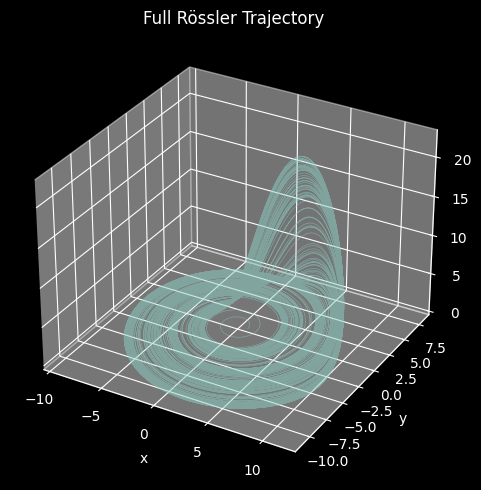

In [234]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.spatial.distance import cdist

# Define the Rössler system
def rossler(t, state, a=0.2, b=0.2, c=5.7):
    x, y, z = state
    dx = -y - z
    dy = x + a * y
    dz = b + z * (x - c)
    return [dx, dy, dz]

# Integrate the system
def integrate_rossler(t_span, y0, dt=0.01):
    t_eval = np.arange(t_span[0], t_span[1], dt)
    sol = solve_ivp(rossler, t_span, y0, t_eval=t_eval, method='RK45')
    return sol.t, sol.y.T

def find_repeated_fragments(time_series, tolerancia=0.05, lag=25):
    fragmentos_repetidos = []
    series_length = len(time_series)
    
    for i in range(series_length - lag):
        fragmento = time_series[i:i + lag + 1]
        for j in range(i + lag + 1, series_length - lag):
            candidato = time_series[j:j + lag + 1]
            if len(fragmento) == len(candidato) and all(abs(fragmento[k] - candidato[k]) <= tolerancia for k in range(len(fragmento))):
                fragmentos_repetidos.append((i, j))
    
    return fragmentos_repetidos

# Main routine
t, trajectory = integrate_rossler((0, 1000), [1, 0, 0])

# Plotting setup
fig = plt.figure(figsize=(12, 5))

# Full trajectory (subplot 1)
ax1 = fig.add_subplot(1, 1, 1, projection='3d')
ax1.plot(trajectory[:, 0], trajectory[:, 1], trajectory[:, 2], lw=0.5, alpha=0.5)
ax1.set_title("Full Rössler Trajectory")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_zlabel("z")

plt.tight_layout()
plt.show()



### 2. Detecting Periodic Orbits Using Close Return Maps

/var/folders/50/49j6_slj4k9bq1x354fp5jwh0000gn/T/ipykernel_93074/2760374448.py:71: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


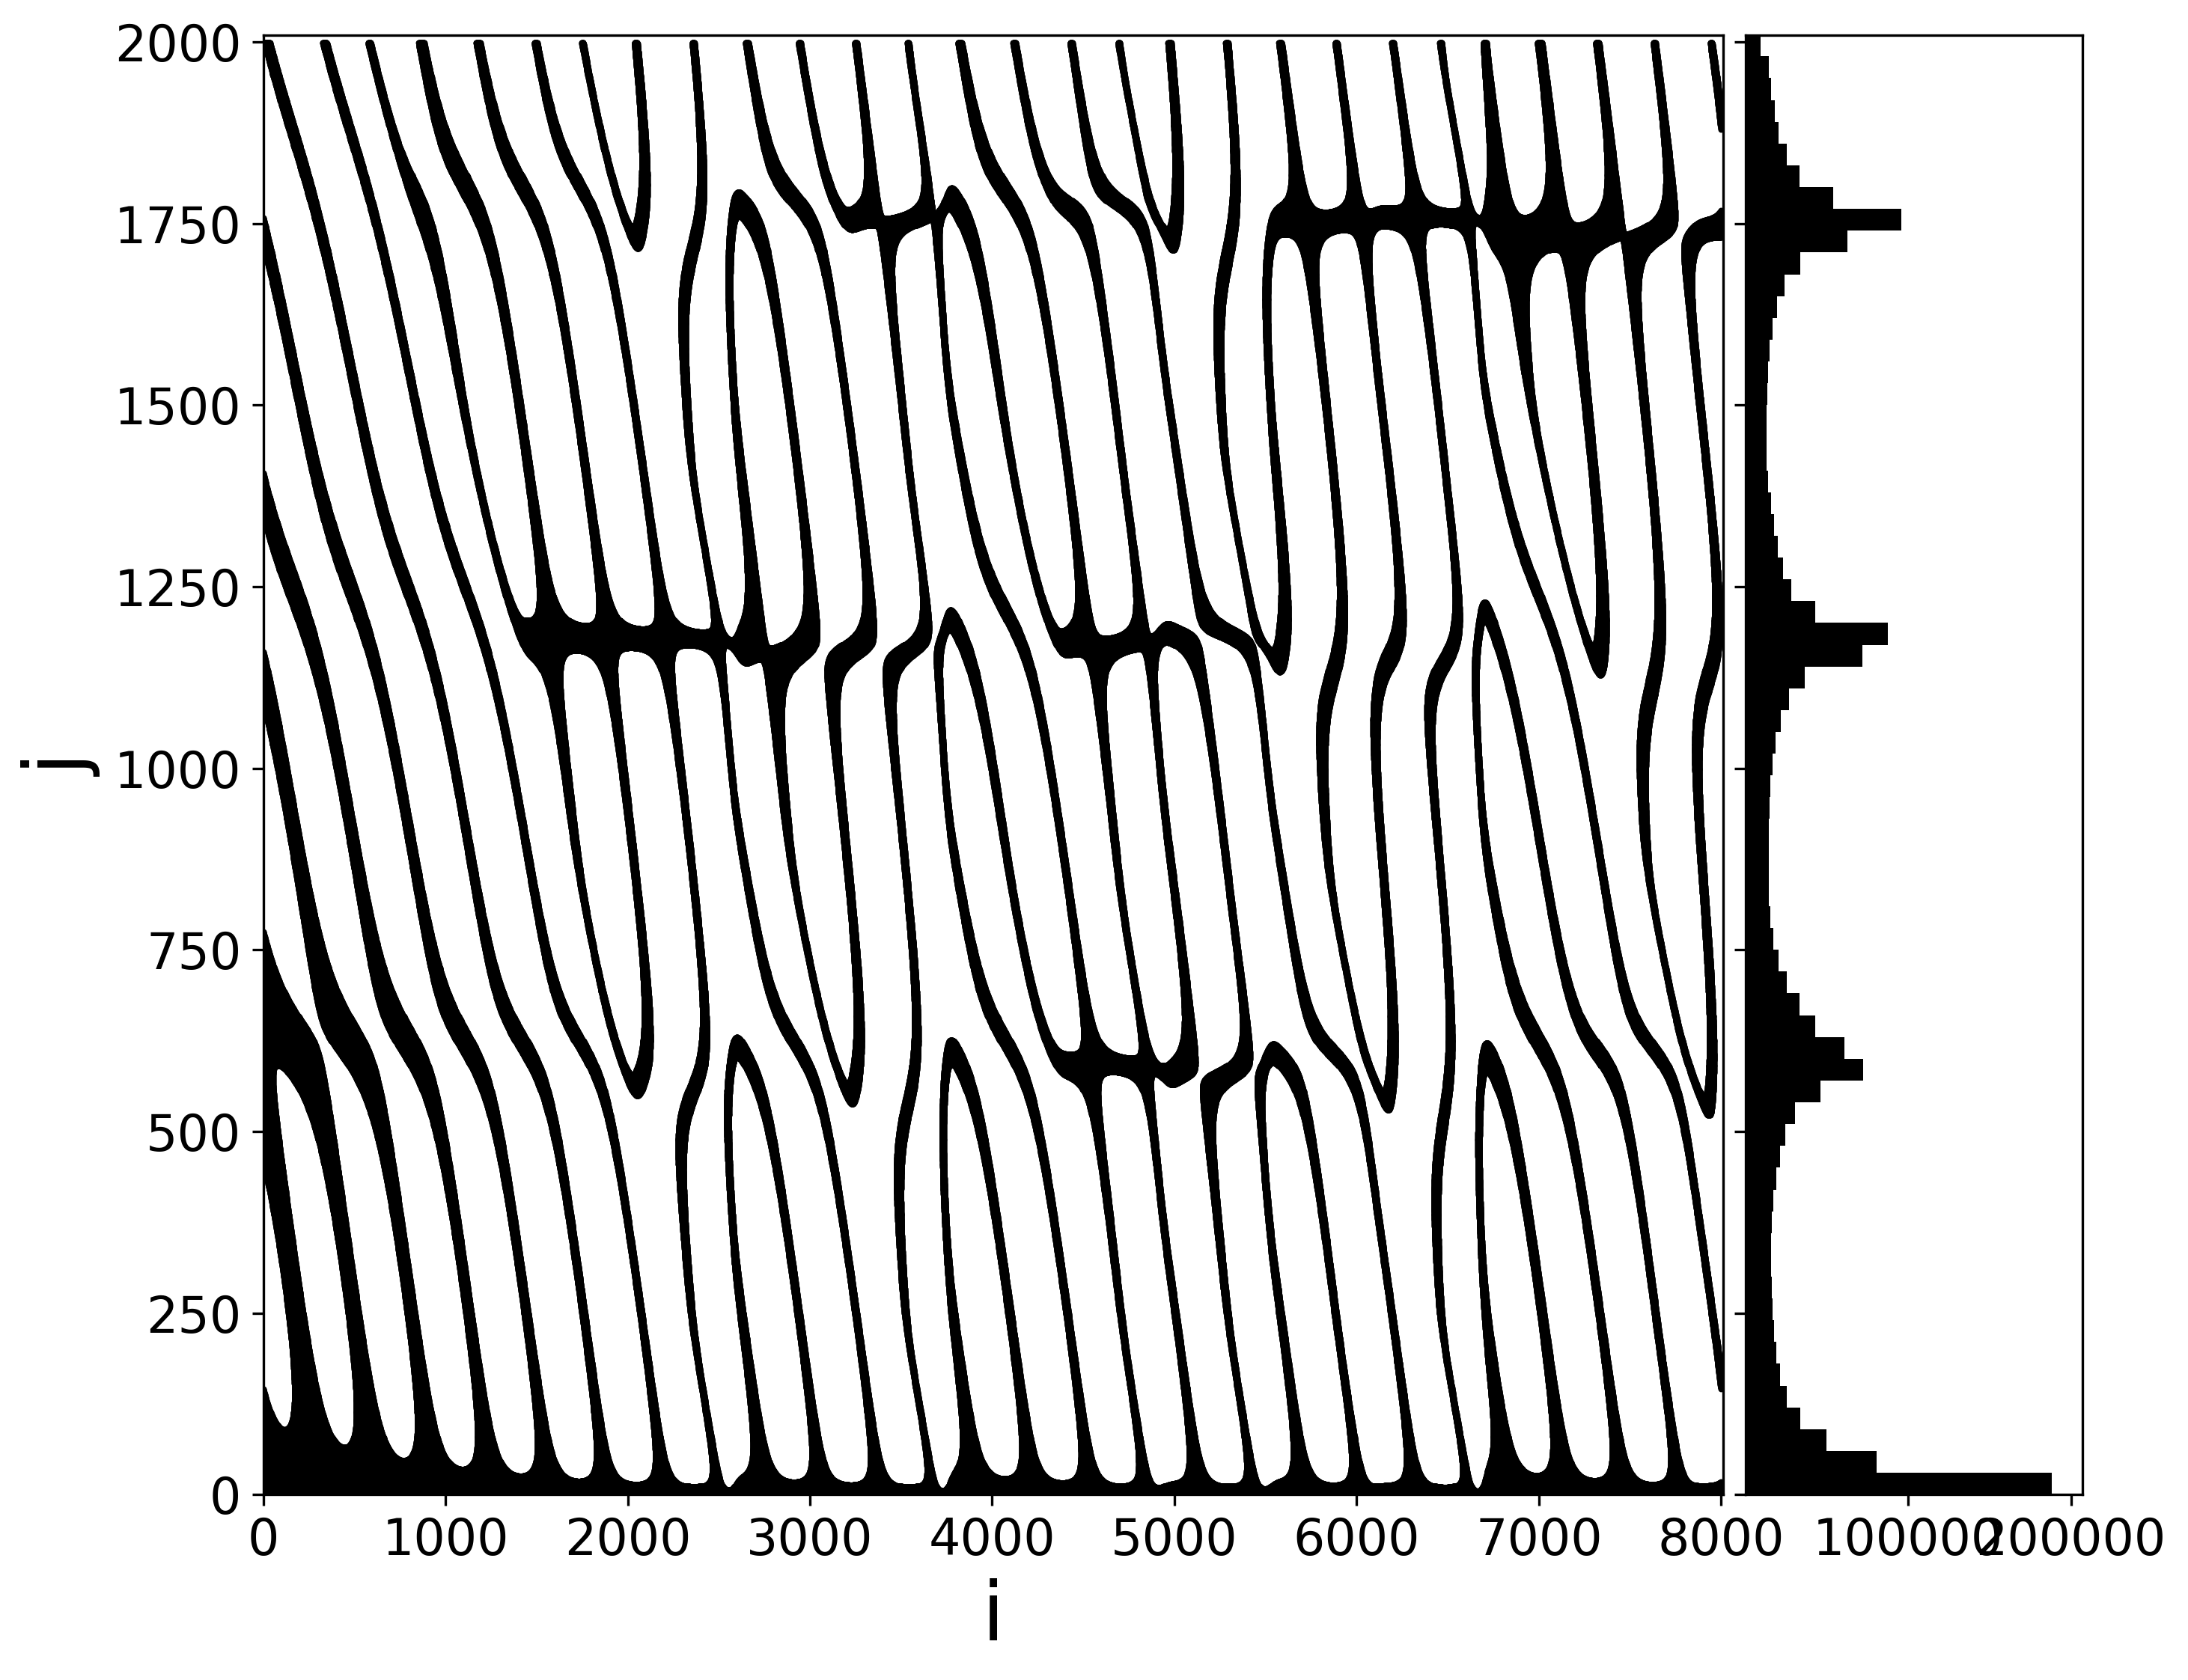

In [124]:
# import numpy as np
# import matplotlib.pyplot as plt

# def close_returns(senal, max_shift=2000, eps_ratio=0.05):
#     """Compute close return map for a 1D signal.
    
#     Parameters:
#     - senal: 1D numpy array
#     - max_shift: number of j values to evaluate
#     - eps_ratio: epsilon threshold relative to signal range
    
#     Returns:
#     - 2D binary array with shape (len(senal), max_shift)
#     """
#     cr = np.zeros((len(senal), max_shift))
#     eps = (np.max(senal) - np.min(senal)) * eps_ratio
#     for j in range(max_shift):
#         for i in range(len(senal) - max_shift):
#             if (np.abs(senal[i + j] - senal[i]) < eps and
#                 np.abs(senal[i + j + 1] - senal[i + 1]) < eps):
#                 cr[i, j] = 1
#     return cr

# def find_indices(matrix):
#     """Return (i, j) indices of 1s in binary matrix."""
#     return list(zip(*np.where(matrix == 1)))

# def figure_cr(x, y, color='k'):
#     """Create a figure with a scatter and histogram of close returns."""
#     fig = plt.figure(figsize=(10, 10), dpi=300)

#     # Define axis geometry
#     rect_scatter = [0.1, 0.1, 0.65, 0.65]
#     rect_histy = [0.76, 0.1, 0.15, 0.65]

#     ax_scatter = plt.axes(rect_scatter)
#     ax_histy = plt.axes(rect_histy)

#     # Main scatter plot
#     ax_scatter.scatter(x, y, s=0.8, color=color)
#     ax_scatter.set_xlabel('i', fontsize=26)
#     ax_scatter.set_ylabel('j', fontsize=26)

#     # Set limits dynamically based on data
#     ax_scatter.set_xlim(0, max(x) + 10)
#     ax_scatter.set_ylim(0, max(y) + 10)

#     # Histogram for the y-axis
#     bins = np.arange(0, max(y) + 30, 30)
#     ax_histy.hist(y, bins=bins, orientation='horizontal', color=color)
#     ax_histy.set_ylim(ax_scatter.get_ylim())
#     ax_histy.set_xlim(1, np.max(np.histogram(y, bins=bins)[0]) * 1.1)

#     # Style
#     ax_scatter.tick_params(labelsize=16)
#     ax_histy.tick_params(labelsize=16, labelleft=False)
#     ax_scatter.xaxis.set_ticks_position('bottom')
#     ax_scatter.yaxis.set_ticks_position('left')

#     return fig

# def close_returns_for_plot(senal):
#     """Wrapper to get x, y arrays for close returns."""
#     cr = close_returns(senal)
#     indices = find_indices(cr)
#     return [i for i, _ in indices], [j for _, j in indices]


# x, y = close_returns_for_plot(trajectory[:10000, 0])
fig = figure_cr(x, y)
fig.show()


In [ ]:

orbits = find_repeated_fragments(trajectory[:10000, 0])

orbits_no_rep = []
orbit0 = orbits[0]
orbits_no_rep.append(orbit0)
for orbit in orbits:
    if ((np.abs(orbit[0] - orbit0[0]) > 200) and (np.abs(orbit[1] - orbit0[1]) > 200)):
        orbits_no_rep.append(orbit)
        orbita0 = orbit

for orbit in orbits_no_rep:
    plt.scatter(orbit[0],orbit[1])

emb_dato = fnn.embedding(15,trajectory[:10000, 0],3).T
for orbit in orbits_no_rep:
    len_orbit = round((orbit[1] - orbit[0]),2)
    print(len_orbit)
    if len_orbit < 6000:
        plot_orbita(emb_dato,orbit[0],orbit[1])
        plt.title('inicio: '+str(orbit[0])+', fin: '+str(orbit[1])+', length: '+str(round((orbit[1] - orbit[0]),2))+' T')

# Plotting setup
fig = plt.figure(figsize=(12, 5))

# Full trajectory (subplot 1)
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.plot(trajectory[:, 0], trajectory[:, 1], trajectory[:, 2], lw=0.5, alpha=0.5)
ax1.set_title("Full Rössler Trajectory")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_zlabel("z")

# Periodic orbits (subplot 2)
ax2 = fig.add_subplot(1, 2, 2, projection='3d')

colors = {'period-2': 'r', 'period-3': 'b'}
labels_plotted = {'period-2': False, 'period-3': False}

for orbit in orbits_no_rep:
    start, end = orbit
    length = end - start

    if 1100 <= length <= 1300 and not labels_plotted['period-2']:
        ax2.plot(trajectory[start:end, 0], trajectory[start:end, 1], trajectory[start:end, 2],
                 color=colors['period-2'], lw=2, label='Period-2 Orbit')
        labels_plotted['period-2'] = True

    elif 1700 <= length <= 1900 and not labels_plotted['period-3']:
        ax2.plot(trajectory[start:end, 0], trajectory[start:end, 1], trajectory[start:end, 2],
                 color=colors['period-3'], lw=2, label='Period-3 Orbit')
        labels_plotted['period-3'] = True

    # Stop if both orbits are found
    if all(labels_plotted.values()):
        break

ax2.set_title("Extracted Periodic Orbits")
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_zlabel("z")
ax2.legend()

plt.tight_layout()
plt.show()


### 3: Linking Number as a Topological Invariant

revisar esto

## Topological Validation Using the Self-Linking Number (SLN)

To validate a dynamical model, we can compare **topological invariants**—like the **self-linking number (SLN)**—between the model’s orbits and those extracted from data.

### What is the Self-Linking Number?

The self-linking number measures how many times a trajectory loops and links with itself. It’s calculated from a 2D projection of the orbit by:

1. **Identifying crossing points** in the projection.
2. **Determining crossing direction**:
   - Draw tangents at each intersection.
   - Rotate the upper strand’s vector to align with the lower one.
   - If the rotation is **clockwise**, assign \( \sigma = -1 \); otherwise, \( \sigma = +1 \).
3. **Summing over all crossings** to compute the SLN:

   \[
   \text{SLN} = \sum_i \sigma_i
   \]

### Implementation Details

- The derivative \( x' = y \) helps determine which strand passes over.
- Crossings where the slope difference is too small (i.e., \( \Delta x' < 0.005 \)) are considered tangents and **excluded** from the count.

This approach was used to analyze all orbits obtained via the **close returns** method.

### Model Validation

When comparing simulated orbits and observed data, **matching SLNs** validate that the model captures the system’s **underlying topology**.


In [ ]:

# G. Uribarri, and G. B. Mindlin, "The structure of reconstructed flows in latent spaces", Chaos 30, 093109 (2020)


# @article{doi:10.1063/5.0013714,
# author = {Uribarri,Gonzalo  and Mindlin,Gabriel B. },
# title = {The structure of reconstructed flows in latent spaces},
# journal = {Chaos: An Interdisciplinary Journal of Nonlinear Science},
# volume = {30},
# number = {9},
# pages = {093109},
# year = {2020},
# doi = {10.1063/5.0013714},
# URL = { 
#         https://doi.org/10.1063/5.0013714
# },
# eprint = { 
#         https://doi.org/10.1063/5.0013714  
# }
# }


from scipy import interpolate
import numpy as np

def _rect_inter_inner(x1,x2):
    n1=x1.shape[0]-1
    n2=x2.shape[0]-1
    X1=np.c_[x1[:-1],x1[1:]]
    X2=np.c_[x2[:-1],x2[1:]]
    S1=np.tile(X1.min(axis=1),(n2,1)).T
    S2=np.tile(X2.max(axis=1),(n1,1))
    S3=np.tile(X1.max(axis=1),(n2,1)).T
    S4=np.tile(X2.min(axis=1),(n1,1))
    return S1,S2,S3,S4

def _rectangle_intersection_(x1,y1,x2,y2):
    S1,S2,S3,S4=_rect_inter_inner(x1,x2)
    S5,S6,S7,S8=_rect_inter_inner(y1,y2)

    C1=np.less_equal(S1,S2)
    C2=np.greater_equal(S3,S4)
    C3=np.less_equal(S5,S6)
    C4=np.greater_equal(S7,S8)

    ii,jj=np.nonzero(C1 & C2 & C3 & C4)
    return ii,jj

def intersection(x1,y1,x2,y2):
    """
    INTERSECTIONS Intersections of curves.
    Computes the (x,y) locations where two curves intersect.  The curves
    can be broken with NaNs or have vertical segments.

    This part of the code was taken from: https://github.com/sukhbinder/intersection
    """
    ii,jj=_rectangle_intersection_(x1,y1,x2,y2)
    n=len(ii)

    dxy1=np.diff(np.c_[x1,y1],axis=0)
    dxy2=np.diff(np.c_[x2,y2],axis=0)

    T=np.zeros((4,n))
    AA=np.zeros((4,4,n))
    AA[0:2,2,:]=-1
    AA[2:4,3,:]=-1
    AA[0::2,0,:]=dxy1[ii,:].T
    AA[1::2,1,:]=dxy2[jj,:].T

    BB=np.zeros((4,n))
    BB[0,:]=-x1[ii].ravel()
    BB[1,:]=-x2[jj].ravel()
    BB[2,:]=-y1[ii].ravel()
    BB[3,:]=-y2[jj].ravel()

    for i in range(n):
        try:
            T[:,i]=np.linalg.solve(AA[:,:,i],BB[:,i])
        except:
            T[:,i]=np.NaN


    in_range= (T[0,:] >=0) & (T[1,:] >=0) & (T[0,:] <=1) & (T[1,:] <=1)

    xy0=T[2:,in_range]
    xy0=xy0.T
    return xy0[:,0],xy0[:,1]

def _closer_point_index(curve,point):
    dist_vec = np.subtract(curve,point)
    normas = np.asarray([np.linalg.norm(vec) for vec in dist_vec])
    ind = np.argmin(normas)
    return ind

def _mad(a, axis=None):
    """
    Compute *Median Absolute Deviation* of an array along given axis.
    """

    # Median along given axis, but *keeping* the reduced axis so that
    # result can still broadcast against a.
    med = np.median(a, axis=axis, keepdims=True)
    mad = np.median(np.abs(a - med), axis=axis)  # MAD along given axis

    return mad


def linking_number(curve_1,curve_2, projection = 'AUTO',puntos_curva=5000, margin=10, verbose=False):
    """
    Computes the *Linking Number* between two three dimensional curves.

    Inputs
    curve_1: array_like
        array of shape (3, N1) with N1 the number of points of curve 1
    curve_2: array_like
        array of shape (3, N2) with N2 the number of points of curve 2
    projection: {'XY','ZX','YZ','AUTO'}, optional
        Projection plane where the intersections will be computed (default 'AUTO')
    puntos_curva: int, optional
        Number of interpolation for B-spline method (default 5000)
    margin:  int, optional
        Distance taken from intersection to compute the vector (default 10)
    verbose: boolean, optional
        Print information about the computation (default False)

    Outputs
    total: float
        Linking Number (it should always be an integer, if not, check changin parameters)
    coords_1: 
        Coordinates of intesection points in the fist dimension of the projection plane (XY','ZX' or'YZ').
    coords_2: 
        Coordinates of intesection points in the second dimension of the projection plane (XY','ZX' or'YZ').

    """

    # We look for the coordinates where the curves are less 'collapsed'
    # For this we calculate the 'mad' (Median Absolute Deviation) in each dimension
    # We project on the dimensions with the highest value of mad
    if projection == 'AUTO':
        mad_x = _mad(curve_1[0]) + _mad(curve_2[0])
        mad_y = _mad(curve_1[1]) + _mad(curve_2[1])
        mad_z = _mad(curve_1[2]) + _mad(curve_2[2])
        if mad_z <= mad_x and mad_z <= mad_y:
            curve_1_projected = curve_1
            curve_2_projected = curve_2
            if verbose == True:
                print('Auto-Projection: XY')
        else:
            if mad_y <= mad_x and mad_y <= mad_x:
                curve_1_projected = [curve_1[2],curve_1[0],curve_1[1]]
                curve_2_projected = [curve_2[2],curve_2[0],curve_2[1]]
                if verbose == True:
                    print('Auto-Projection: ZX')

            else:
                if mad_x <= mad_y and mad_x <= mad_z:
                    curve_1_projected = [curve_1[1],curve_1[2],curve_1[0]]
                    curve_2_projected = [curve_2[1],curve_2[2],curve_2[0]]
                    if verbose == True:
                        print('Auto-Projection: YZ')

    if projection == 'XY':
        if verbose == True:
                    print('Projection: XY')
        curve_1_projected = curve_1
        curve_2_projected = curve_2

    if projection == 'ZX':
        if verbose == True:
                    print('Projection: ZX')
        curve_1_projected = [curve_1[2],curve_1[0],curve_1[1]]
        curve_2_projected = [curve_2[2],curve_2[0],curve_2[1]]

    if projection == 'YZ':
        if verbose == True:
                    print('Projection: YZ')
        curve_1_projected = [curve_1[1],curve_1[2],curve_1[0]]
        curve_2_projected = [curve_2[1],curve_2[2],curve_2[0]]
        
    # Puntos Curva:
    # Value that determines the resolution with which we are going to resample the curves
    # (the higher the resolution, the better the result of '_closer_point_index')
   
    # We define the vector with which we will interpolate the curves
    pasos_curva = np.divide(1,puntos_curva)
    unew = np.arange(0, 1+np.divide(pasos_curva,2), pasos_curva)

    # Interpolation of both curves
    tck, u = interpolate.splprep(curve_1_projected, s=0,k=1)
    [c1_dim1, c1_dim2,c1_dim3] = interpolate.splev(unew, tck)
    tck, u = interpolate.splprep(curve_2_projected, s=0,k=1)
    [c2_dim1, c2_dim2,c2_dim3] = interpolate.splev(unew, tck)

    # We compute the intersection between both curves
    coords_1,coords_2=intersection(c1_dim1,c1_dim2,c2_dim1,c2_dim2)

    sign = []
    arriba = []
    total = 0

    # We iterate over each intersection found
    for num in range(len(coords_1)):

        point = np.asarray([coords_1[num],coords_2[num]])

        if verbose == True:
            print('\nDim1:',point[0])
            print('Dim2:',point[1])
            
        curve_1 = np.array(list(zip(c1_dim1,c1_dim2)))
        curve_2 = np.array(list(zip(c2_dim1,c2_dim2)))

        inter_index_1 = _closer_point_index(curve_1,point)
        inter_index_2 = _closer_point_index(curve_2,point)

        
        # If the intersection is near the end of the curve
        # the sum of 'margin' can exceed the length of it
        if inter_index_1 + margin >= len(curve_1):
            final_1 = curve_1[inter_index_1+margin-len(curve_1)]
        else:
            final_1 = curve_1[inter_index_1+margin]
        if inter_index_2 + margin >= len(curve_2):
            final_2 = curve_2[inter_index_2+margin-len(curve_2)]
        else:
            final_2 = curve_2[inter_index_2+margin]

        # In the case of the beginning of the curve it resolves itself
        # (a negative index checks the vector backwards)
        inicio_1 = curve_1[inter_index_1-margin]
        inicio_2 = curve_2[inter_index_2-margin]

        # We define a vector that indicates the direction and direction of the flow at the point of intersection
        # (We do it by subtracting a point from an instant before a point from a later instant)
        flecha_1 = np.subtract(final_1,inicio_1)
        flecha_2 = np.subtract(final_2,inicio_2)

        #print('Altura_1 : ',c1_dim3[inter_index_1])
        #print('Altura_2 : ',c2_dim3[inter_index_2])

        # We check which curve passes overhead at the intersection (In the coordinate that we do NOT use in the projection)
        # We compute the vector product to know if it goes clockwise or counter-clockwise
        if c1_dim3[inter_index_1] > c2_dim3[inter_index_2]:
            if verbose == True:
                print('Upper curve: Curve 1')
            arriba.append(0)
            prod_vec = np.cross(flecha_1,flecha_2)

        else:
            if verbose == True:
                print('Upper curve: Curve 2')
            arriba.append(1)
            prod_vec = np.cross(flecha_2,flecha_1)
            
        if verbose == True:
            print('Vector Product:',prod_vec)

        # We add to the total according to the result
        if prod_vec > 0 :
            sign.append(1)
            total = total + 0.5
        else:
            sign.append(-1)
            total = total - 0.5

    if verbose == True:
        print('\nLinking number: ', total)

    return total,coords_1,coords_2

In [128]:
# Extract orbits from trajectory
orbit_period_2 = None
orbit_period_3 = None

for orbita in orbitas_posta:
    start, end = orbita
    length = end - start

    if 1100 <= length <= 1300 and orbit_period_2 is None:
        orbit_period_2 = trajectory[start:end].T  # Shape (3, N)
    elif 1700 <= length <= 1900 and orbit_period_3 is None:
        orbit_period_3 = trajectory[start:end].T  # Shape (3, N)
    
    if orbit_period_2 is not None and orbit_period_3 is not None:
        break

import linking_number_functions as ln
# Compute linking number between the two selected orbits
ln_value, coords_x, coords_y = ln.linking_number(orbit_period_2, orbit_period_3, projection='AUTO', verbose=True)

print(f"Linking number between period-2 and period-3 orbits: {ln_value}")


Auto-Projection: XY

Dim1: 6.064309213391564
Dim2: 1.0576381800392751
Upper curve: Curve 2
Vector Product: -0.21285637739299096

Dim1: 10.177237818874037
Dim2: -0.8097307242987136
Upper curve: Curve 2
Vector Product: -0.015031120806414645

Dim1: 7.489932583105853
Dim2: 1.9168646697305083
Upper curve: Curve 1
Vector Product: -0.08858072456676261

Dim1: 2.8052274002549984
Dim2: 3.582670288320305
Upper curve: Curve 1
Vector Product: -0.05519044630548681

Linking number:  -2.0
Linking number between period-2 and period-3 orbits: -2.0


### 4. False Nearest Neighbors and Embedding Analysis

#### A. Embedding Construction

Given a time series \( x(t) \), we construct a time-delay embedding of dimension \( w \) and delay \( \tau \) using:

\[
\mathbf{y}_k = [x_k, x_{k+\tau+1}, x_{k+2(\tau+1)}, \ldots, x_{k+(w-1)(\tau+1)}]
\]

where \( k = 0, \ldots, N - (w - 1)(\tau + 1) \). The embedding matrix \( \mathbf{Y} \in \mathbb{R}^{N' \times w} \) is then defined by stacking each \( \mathbf{y}_k \) as rows.

#### B. Nearest Neighbor Search (`vecinos` function)

Given embedded data \( \mathbf{Y} = [\mathbf{y}_1, \ldots, \mathbf{y}_N] \), the goal is to compute the nearest neighbor of each point:

1. For each \( i \), compute the squared Euclidean distance:

\[
D_{ij} = \|\mathbf{y}_i - \mathbf{y}_j\|^2 \quad \text{for } j > i
\]

2. Construct a symmetric distance matrix \( D \in \mathbb{R}^{N \times N} \) with:

- \( D_{ii} = 100 \) (large constant to avoid self-matching),
- \( D_{ij} = D_{ji} \) for \( i \neq j \).

3. Find nearest neighbor index:

\[
\text{idx}_i = \arg\min_{j} D_{ij}
\]

4. The minimum Euclidean distance is:

\[
d_i = \sqrt{D_{i, \text{idx}_i}}
\]

#### C. False Nearest Neighbors (`porcentaje_falsos_vecinos` function)

The percentage of false nearest neighbors is evaluated as a function of embedding dimension \( w \). For each \( w = 1, 2, \ldots, 5 \):

1. For each point \( \mathbf{y}_k \), and its nearest neighbor \( \mathbf{y}_{\text{idx}_k} \), compute the normalized growth in the added dimension:

\[
R_k = \frac{|x_{k + wT} - x_{\text{idx}_k + wT}|}{d_k}
\]

2. A point is considered to have a **false nearest neighbor** if:

\[
R_k \geq 10
\]

3. The **percentage of false neighbors** is:

\[
\text{FNN}_w = \frac{\#\{k : R_k \geq 10\}}{N - T}
\]

4. The process is repeated for dimensions \( w = 1 \) through \( 5 \), and the percentage of false neighbors for each is returned as a list:

\[
[\text{FNN}_1, \text{FNN}_2, \ldots, \text{FNN}_5]
\]

#### Summary

This approach helps determine the **minimum embedding dimension** required to unfold the dynamics of a time series by evaluating when the proportion of false nearest neighbors significantly decreases.


In [ ]:
import numpy as np 

def vecinos(y, dim):
    #y contiene los puntos del embedding [[P1], [P2], [P3],...,[PN]]
    #dim = la dimension del embedding
    #Definimos el numero de puntos
    N = len(y)
    #Transformamos el vector y en un array
    y = np.array(y)
    #Inicializamos la matriz de distancia cuadrática entre puntos i j
    Dij = []
    #Calculamos las distancias
    for k in range(len(y)-1):
        #Armamos una matriz de "N-k-1" filas y "dim" columnas en las que se
        #repite el punto Pk al que le vamos a calcular la distancia con el resto
        My = np.full((N-k-1, dim), y[k])
        if dim ==1:
            #Si la dimension es 1, la distancia es restar (Pk - Pj)^2
            Dktodos = np.power((My.transpose() - y[k+1:])[0], 2, dtype=float)
        else:
            #Si la dimension es >1, la distancia es ((xk-xj)^2+(yk-yj)^2+...)
            #por eso hacemos la resta de componentes, elevamos al cuadrado
            #y despues sumamos
            Dktodos = np.sum(np.power(My-y[k+1:],2, dtype=float), 1, dtype=float)
        #La fila de la matriz va a ser ceros hasta el lugar k y despues empiezan
        #las distancias que calculamos
        fila = list(np.concatenate((np.zeros(k+1), Dktodos)))
        Dij.append(fila)
        #print("Porcentaje :", 100*k/N)
    #Al ultimo punto no hace falta calcularle las distancias. Agregamos una fila
    #de ceros
    Dij.append(list(np.zeros(N)))
    Dij = np.array(Dij)
    #Hasta aca tenemos una matriz triangular superior, con ceros en la diagonal
    #La matriz debe ser simetrica. Y para que al buscar la minima distancia
    #no nos agarre el punto consigmo mismo; le sumamos algo grande a la diagonal    
    Dij = Dij + Dij.transpose() + np.eye(N) *100
    #Ya teniendo la matriz de distancias cuadraticas, buscamos los indices
    #en los que esta el minimo de cada fila
    indice_min = np.argmin(Dij, 1)
    #Teniendo los indices, guardamos la minima distancia
    dist_min = []
    for k in range(N):
        dist_min.append(np.sqrt(Dij[k][indice_min[k]]))
    #Por utlimo, devolvemos los indices de minimo y el valor de la distancia
    return indice_min, dist_min



def porcentaje_falsos_vecinos(x):
    porcentaje_falsos_vecinos = []
    dim = 1

    T = 50
    indice_min, dist_min = vecinos(x, dim)
    #Determino cuales son falsos vecinos para 1d
    R_crecimiento = []
    falsos_vecinos = 0
    puntos_noanalizados = 0
    for k in range(len(indice_min)-T):
        if indice_min[k]+dim*T < len(x):
            R_aux = np.abs( x[k+dim*T] - x[indice_min[k]+dim*T] ) / dist_min[k]
            R_crecimiento.append(R_aux)
            if R_aux >= 10:
                falsos_vecinos+=1
        else:
            puntos_noanalizados+=1

    porcentaje_falsos_vecinos.append(falsos_vecinos / (len(x)-T))
    
    y_emb_2 = []

    for k in range(len(x)-1*T):
        y_emb_2.append([x[k], x[k+T]])

    dim = 2
    indice_min, dist_min = vecinos(y_emb_2, dim)

    #Determino cuales son falsos vecinos para 2d
    R_crecimiento = []
    falsos_vecinos = 0
    puntos_noanalizados = 0
    for k in range(len(indice_min)-T):
        if indice_min[k]+dim*T < len(x):
            R_aux = np.abs( x[k+dim*T] - x[indice_min[k]+dim*T] ) / dist_min[k]
            R_crecimiento.append(R_aux)
            if R_aux >= 10:
                falsos_vecinos+=1
        else:
            puntos_noanalizados+=1
    print("El porcentaje de falsos vecinos es:", falsos_vecinos / (len(x)-T))
    print(puntos_noanalizados)
    porcentaje_falsos_vecinos.append(falsos_vecinos / (len(x)-T))

    y_emb_3 = []

    for k in range(len(x)-2*T):
        y_emb_3.append([x[k], x[k+T], x[k+2*T]])

    dim = 3
    indice_min, dist_min = vecinos(y_emb_3, dim)
    #Determino cuales son falsos vecinos para 3d
    R_crecimiento = []
    falsos_vecinos = 0
    puntos_noanalizados = 0
    for k in range(len(indice_min)-T):
        if indice_min[k]+dim*T < len(x):
            R_aux = np.abs( x[k+dim*T] - x[indice_min[k]+dim*T] ) / dist_min[k]
            R_crecimiento.append(R_aux)
            if R_aux >= 10:
                falsos_vecinos+=1
        else:
            puntos_noanalizados+=1
    print("El porcentaje de falsos vecinos es:", falsos_vecinos / (len(x)-T))
    print(puntos_noanalizados)
    porcentaje_falsos_vecinos.append(falsos_vecinos / (len(x)-T))


    y_emb_4 = []

    for k in range(len(x)-3*T):
        y_emb_4.append([x[k], x[k+T], x[k+2*T], x[k+3*T]])

    dim = 4
    indice_min, dist_min = vecinos(y_emb_4, dim)

    #Determino cuales son falsos vecinos para 4d
    R_crecimiento = []
    falsos_vecinos = 0
    puntos_noanalizados = 0
    for k in range(len(indice_min)-T):
        if indice_min[k]+dim*T < len(x):
            R_aux = np.abs( x[k+dim*T] - x[indice_min[k]+dim*T] ) / dist_min[k]
            R_crecimiento.append(R_aux)
            if R_aux >= 10:
                falsos_vecinos+=1
        else:
            puntos_noanalizados+=1
            
    porcentaje_falsos_vecinos.append(falsos_vecinos / (len(x)-T))

    y_emb_5 = []

    for k in range(len(x)-4*T):
        y_emb_5.append([x[k], x[k+T], x[k+2*T], x[k+3*T], x[k+4*T]])

    dim = 5
    indice_min, dist_min = vecinos(y_emb_5, dim)
    #Determino cuales son falsos vecinos para 4d
    R_crecimiento = []
    falsos_vecinos = 0
    puntos_noanalizados = 0
    for k in range(len(indice_min)-T):
        if indice_min[k]+dim*T < len(x):
            R_aux = np.abs( x[k+dim*T] - x[indice_min[k]+dim*T] ) / dist_min[k]
            R_crecimiento.append(R_aux)
            if R_aux >= 10:
                falsos_vecinos+=1
        else:
            puntos_noanalizados+=1

    porcentaje_falsos_vecinos.append(falsos_vecinos / (len(x)-T))
    return porcentaje_falsos_vecinos


def embedding(tau, dato, w):
    """
    Generalized embedding function.

    Parameters:
    - tau: time delay
    - dato: 1D numpy array (signal)
    - w: embedding dimension

    Returns:
    - embedding: 2D numpy array of shape (N, w)
    """
    if len(dato.shape) != 1:
        raise ValueError("Input 'dato' must be a 1D array.")

    max_index = dato.shape[0] - (w - 1) * (tau + 1)
    if max_index <= 0:
        raise ValueError("Embedding dimension and tau too large for data length.")

    indices = (np.arange(w) * (tau + 1)) + np.arange(max_index).reshape(-1, 1)
    embedding = dato[indices]

    return embedding  # shape (N, w)

    

### 5. Time delay embedding

In [ ]:
from scipy.signal import argrelextrema

def time_delay_embedding(x, m=3, tau=20):
    N = len(x) - (m - 1) * tau
    return np.array([x[i:i + m * tau:tau] for i in range(N)])

# Example usage
embedded = time_delay_embedding(trajectory[:, 0], m=3, tau=50)


### 6. SINDy

In [125]:
import pysindy as ps

# Use embedded data or raw trajectory
model = ps.SINDy()
model.fit(trajectory, t=0.01)
model.print()


(x0)' = -1.000 x1 + -1.000 x2
(x1)' = 1.000 x0 + 0.200 x1
(x2)' = 0.200 1 + -5.711 x2 + 1.003 x0 x2


### 7. Complexity 

In [ ]:
from math import log, sqrt, acos
from itertools import permutations

def bandt_pompe_probs(time_series, n=5, step=180):
    perms = list(permutations(range(n)))
    counts = dict.fromkeys(perms, 0)
    N = len(perms)
    for i in range(0, len(time_series) - n * step, step):
        window = time_series[i:i + n * step:step]
        order = tuple(np.argsort(window))
        counts[order] += 1
    total = sum(counts.values())
    return np.array([counts[p] / total for p in perms])

def permutation_entropy(p):
    p_nonzero = p[p > 0]
    return -np.sum(p_nonzero * np.log(p_nonzero)) / np.log(len(p))

def disequilibrium_DM(p):
    N = len(p)
    peq = 1 / N
    cosine = np.sum(np.sqrt(p * peq))
    D0 = 1 / acos(sqrt(peq))
    return D0 * acos(cosine)

def statistical_complexity(ts, n=5, step=180):
    p = bandt_pompe_probs(ts, n, step)
    H = permutation_entropy(p)
    Dm = disequilibrium_DM(p)
    return H, Dm, H * Dm


### Analysis of climate data 

Proposed activity:

1. Detect unstable period orbits in the attractor? What is the period of the recurrences? Extract recurrences from the data. Compute self-linking number and try to compute the linking number between orbits of different periods if you find them. 
2. Do different climate time series present recurrences of the same period? 
4. Find the effective dimension of the system using one of the time series. 
5. Reconstruct the phase space of the data using time-delay embedding.
6. Use SINDy to find a dynamical system from the data. Integrate the system. 
7. Search for recurrences in the integrated system. Evaluate the linking number. 

AT THE END SAVE pip freeze > requirements.txt

In [1]:
### Data manipulation
import numpy as np
import pandas as pd
import xarray as xr

### Plotting
import matplotlib.pyplot as plt
from matplotlib import cm

### Processing data
from scipy.interpolate import interp1d
import scipy
from scipy.signal import filtfilt
from scipy.interpolate import CubicSpline
from mpl_toolkits.mplot3d import Axes3D
from itertools import combinations

# Functions for this tutorial
import dynamical_systems_functions as dsf
import false_nearest_neighbors as fnn

###

In [2]:
def plot_attractor(df,inicio,fin,color='-g'):
  """                                                                                                                                                    
  Scaling is done from here...                                                                                                                           
  """
  x_scale=1
  y_scale=1
  z_scale=1

  scale=np.diag([x_scale, y_scale, z_scale, 1.0])
  scale=scale*(1.0/scale.max())
  scale[3,3]=1.2

  def short_proj():
    return np.dot(Axes3D.get_proj(ax), scale)

  fig = plt.figure(figsize=(10,12),dpi=300)
  ax = fig.add_subplot(111, projection='3d')
  ax.get_proj=short_proj
  ax.plot(df[0][inicio:fin], df[1][inicio:fin], df[2][inicio:fin],color,linewidth=3)
  ax.tick_params(axis='both', labelsize= 18)
  ax.set_xlabel(r'X$_{obs}$(t)',fontsize=15)
  ax.set_ylabel(r'X$_{obs}$(t-$\tau$)',fontsize=15)
  ax.set_zlabel(r'X$_{obs}$(t-2$\tau$)',fontsize=15)
  return fig


In [3]:
# Replace 'your_file.pkl' with your actual file path
df = pd.read_pickle('/Users/jumindlin/Library/CloudStorage/Dropbox/Leipzig (Selective Sync Conflict)/Mallorca/database.pkl')

In [4]:
list(df.keys())

['spatiotemporal_intermittency_ii_alpha-1-75_epsilon-0-3_M10_T100',
 'spatiotemporal_intermittency_ii_alpha-1-75_epsilon-0-3_M10_T500',
 'spatiotemporal_intermittency_ii_alpha-1-75_epsilon-0-3_M20_T100',
 'spatiotemporal_intermittency_ii_alpha-1-75_epsilon-0-3_M20_T500',
 'chaotic_brownian_motion_of_defect_alpha-1-85_epsilon-0-1_M5_T100',
 'chaotic_brownian_motion_of_defect_alpha-1-85_epsilon-0-1_M5_T500',
 'chaotic_brownian_motion_of_defect_alpha-1-85_epsilon-0-1_M5_T1000',
 'chaotic_brownian_motion_of_defect_alpha-1-85_epsilon-0-1_M5_T2000',
 'chaotic_brownian_motion_of_defect_alpha-1-85_epsilon-0-1_M10_T100',
 'chaotic_brownian_motion_of_defect_alpha-1-85_epsilon-0-1_M10_T500',
 'chaotic_brownian_motion_of_defect_alpha-1-85_epsilon-0-1_M10_T1000',
 'chaotic_brownian_motion_of_defect_alpha-1-85_epsilon-0-1_M20_T100',
 'chaotic_brownian_motion_of_defect_alpha-1-85_epsilon-0-1_M20_T500',
 'traveling_wave_alpha-1-67_epsilon-0-5_M10_T100',
 'traveling_wave_alpha-1-67_epsilon-0-5_M20_T100

In [5]:
df['TestCLIM_S5']['data'].shape

(17, 250)

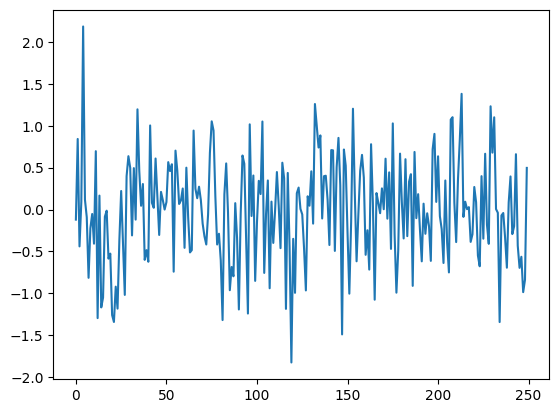

In [14]:
plt.plot(df['TestCLIM_S5']['data'][14,:])

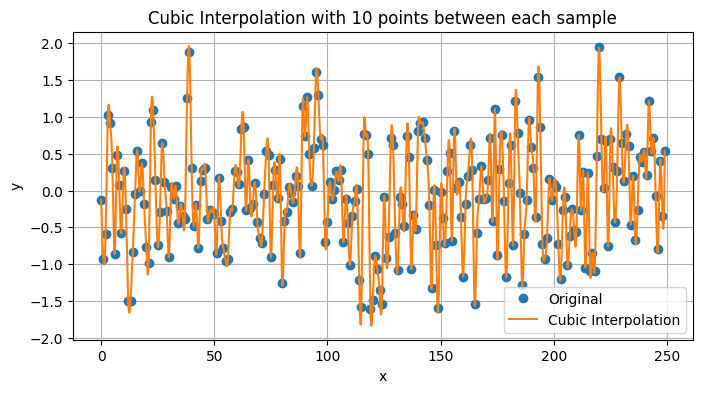

In [32]:
# Example time series
x = np.arange(0,len(df['TestCLIM_S5']['data'][2,:]),1)
y = df['TestCLIM_S5']['data'][2,:]

# Create interpolation function (cubic)
f_interp = interp1d(x, y, kind='cubic')

# Create new x values: 30 points between each original point
points_per_interval = 30
x_interp = np.linspace(x[0], x[-1], num=(len(x) - 1) * (points_per_interval + 1) + 1)
y_interp = f_interp(x_interp)

# Plotting
plt.figure(figsize=(8, 4))
plt.plot(x, y, 'o', label='Original')
plt.plot(x_interp, y_interp, '-', label='Cubic Interpolation')
plt.legend()
plt.title("Cubic Interpolation with 10 points between each sample")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

In [33]:
pfv = fnn.porcentaje_falsos_vecinos(y_interp)

El porcentaje de falsos vecinos es: 0.6384615384615384
55
El porcentaje de falsos vecinos es: 0.09765319426336376
12


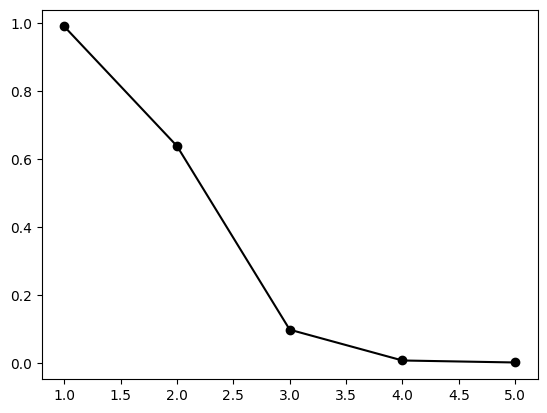

In [34]:
plt.scatter(np.arange(1,6,1),pfv,color='k')
plt.plot(np.arange(1,6,1),pfv,color='k')

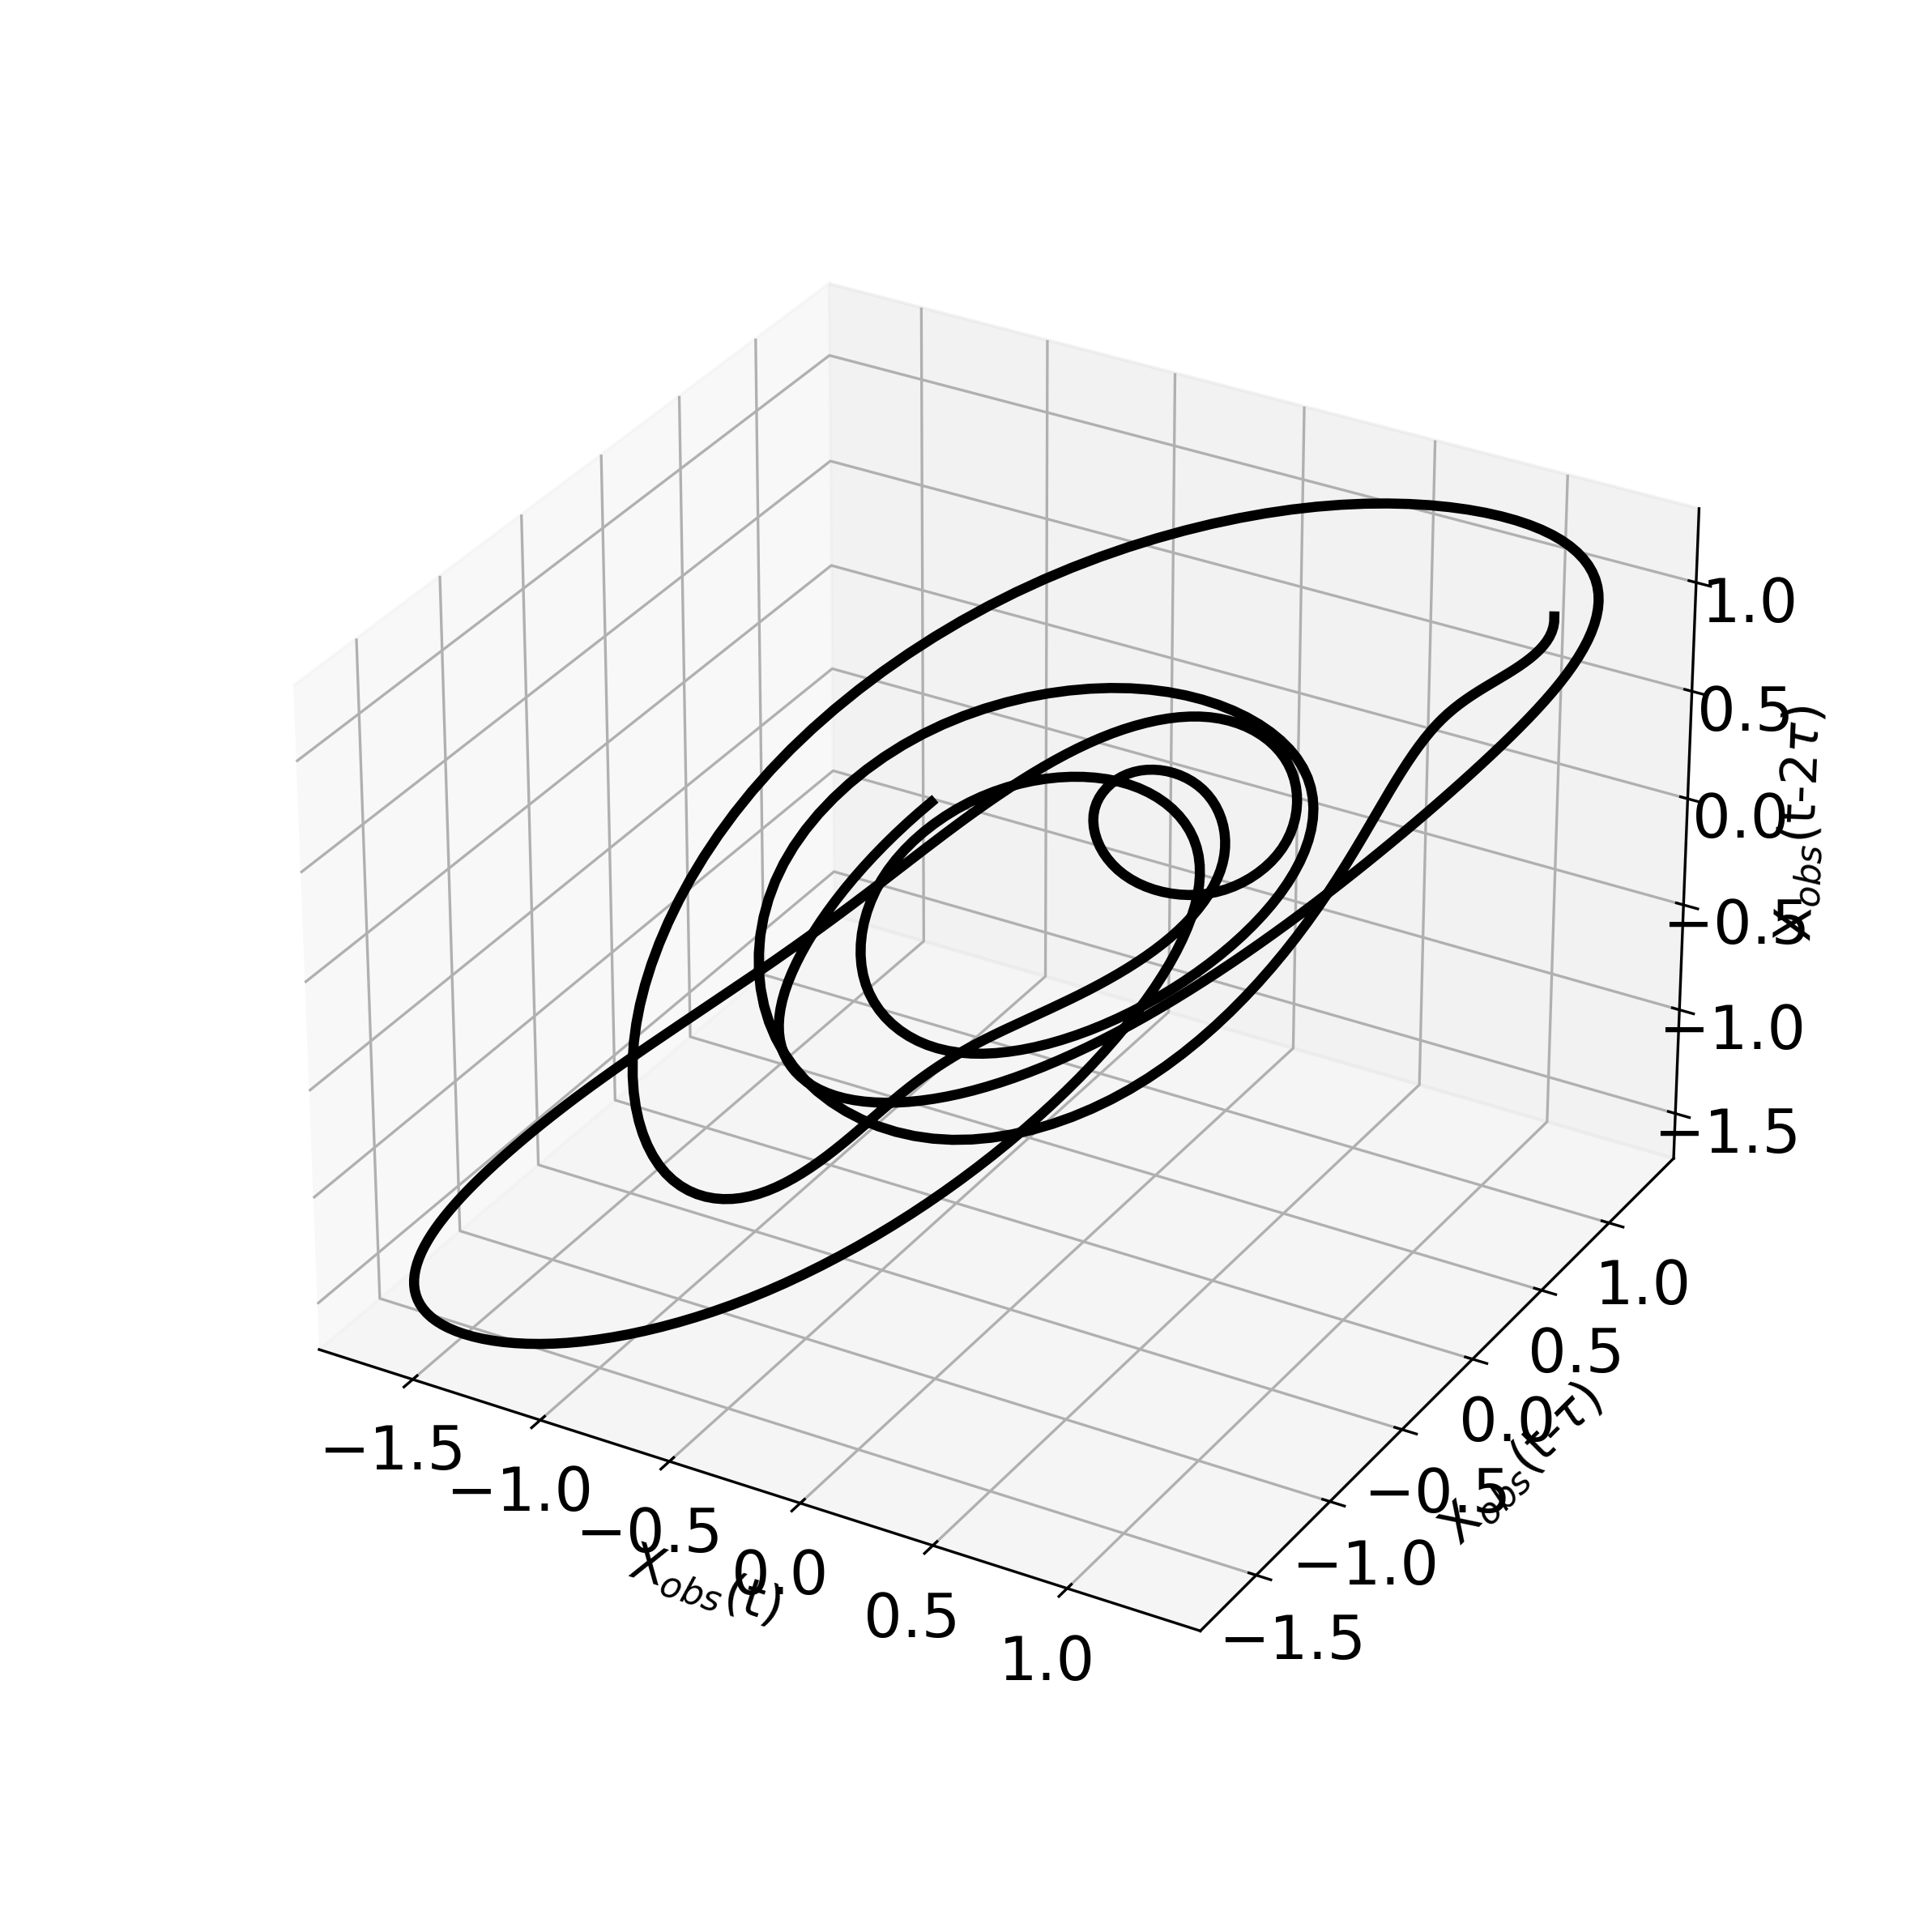

In [35]:
df_data = fnn.embedding(10,y_interp,3).T
fig = plot_attractor(df_data,100,800,color='k')

/var/folders/50/49j6_slj4k9bq1x354fp5jwh0000gn/T/ipykernel_93074/4044738542.py:71: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


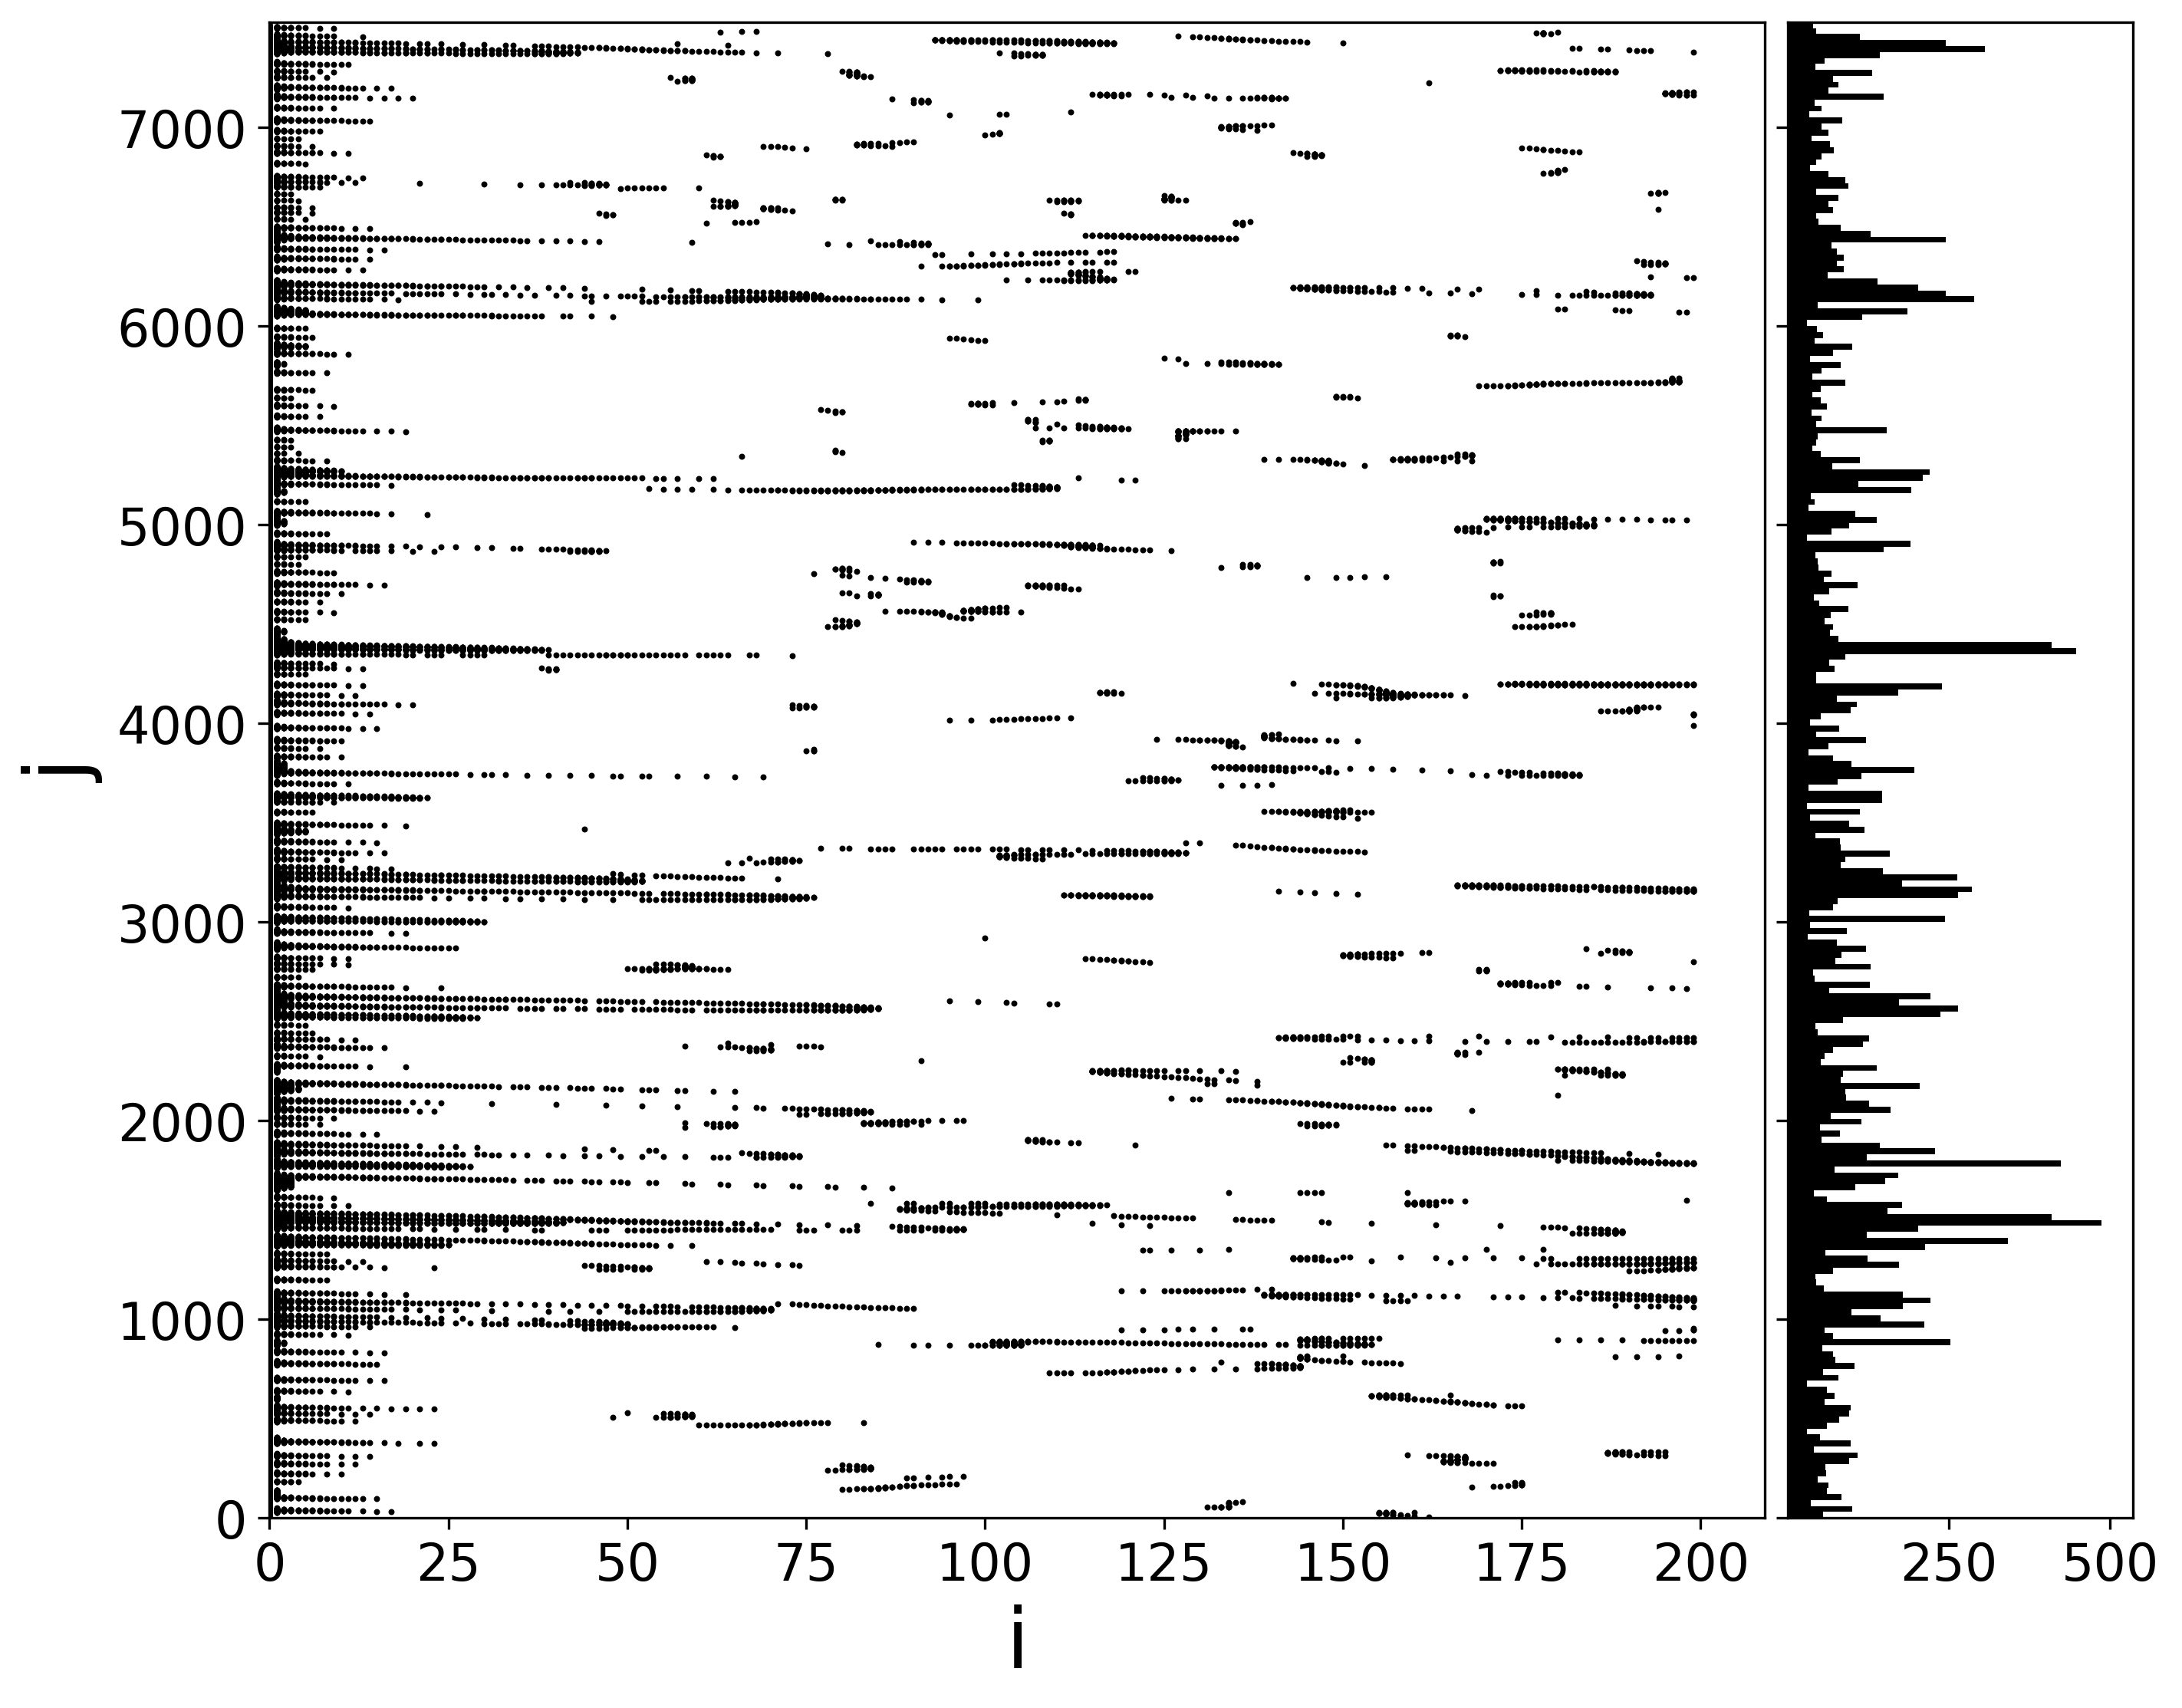

In [88]:
import numpy as np
import matplotlib.pyplot as plt

def close_returns(senal, max_shift=200, eps_ratio=0.005):
    """Compute close return map for a 1D signal.
    
    Parameters:
    - senal: 1D numpy array
    - max_shift: number of j values to evaluate
    - eps_ratio: epsilon threshold relative to signal range
    
    Returns:
    - 2D binary array with shape (len(senal), max_shift)
    """
    cr = np.zeros((len(senal), max_shift))
    eps = (np.max(senal) - np.min(senal)) * eps_ratio
    for j in range(max_shift):
        for i in range(len(senal) - max_shift):
            if (np.abs(senal[i + j] - senal[i]) < eps and
                np.abs(senal[i + j + 1] - senal[i + 1]) < eps):
                cr[i, j] = 1
    return cr

def find_indices(matrix):
    """Return (i, j) indices of 1s in binary matrix."""
    return list(zip(*np.where(matrix == 1)))

def figure_cr(x, y, color='k'):
    """Create a figure with a scatter and histogram of close returns."""
    fig = plt.figure(figsize=(10, 10), dpi=300)

    # Define axis geometry
    rect_scatter = [0.1, 0.1, 0.65, 0.65]
    rect_histy = [0.76, 0.1, 0.15, 0.65]

    ax_scatter = plt.axes(rect_scatter)
    ax_histy = plt.axes(rect_histy)

    # Main scatter plot
    ax_scatter.scatter(x, y, s=0.8, color=color)
    ax_scatter.set_xlabel('i', fontsize=26)
    ax_scatter.set_ylabel('j', fontsize=26)

    # Set limits dynamically based on data
    ax_scatter.set_xlim(0, max(x) + 10)
    ax_scatter.set_ylim(0, max(y) + 10)

    # Histogram for the y-axis
    bins = np.arange(0, max(y) + 30, 30)
    ax_histy.hist(y, bins=bins, orientation='horizontal', color=color)
    ax_histy.set_ylim(ax_scatter.get_ylim())
    ax_histy.set_xlim(1, np.max(np.histogram(y, bins=bins)[0]) * 1.1)

    # Style
    ax_scatter.tick_params(labelsize=16)
    ax_histy.tick_params(labelsize=16, labelleft=False)
    ax_scatter.xaxis.set_ticks_position('bottom')
    ax_scatter.yaxis.set_ticks_position('left')

    return fig

def close_returns_for_plot(senal):
    """Wrapper to get x, y arrays for close returns."""
    cr = close_returns(senal)
    indices = find_indices(cr)
    return [i for i, _ in indices], [j for _, j in indices]


x, y = close_returns_for_plot(y_interp)
fig = figure_cr(y, x)
fig.show()


In [51]:
def find_repeated_fragments(time_series, tolerancia=0.05, lag=25):
    fragmentos_repetidos = []
    series_length = len(time_series)
    
    for i in range(series_length - lag):
        fragmento = time_series[i:i + lag + 1]
        for j in range(i + lag + 1, series_length - lag):
            candidato = time_series[j:j + lag + 1]
            if len(fragmento) == len(candidato) and all(abs(fragmento[k] - candidato[k]) <= tolerancia for k in range(len(fragmento))):
                fragmentos_repetidos.append((i, j))
    
    return fragmentos_repetidos

def plot_orbita(df,inicio,fin,color='-g'):
  fig = plt.figure(figsize=(10,10))
  ax = fig.add_subplot(111, projection='3d')
  ax.plot(df[0][inicio:fin], df[1][inicio:fin], df[2][inicio:fin],color,linewidth=3)
  return ax


12.54
17.73
15.58
0.71
1.7
6.44
11.73
10.94
10.1
1.86
1.21
2.55
5.38
0.68
11.2
5.65
4.18
14.81
4.85
12.53
3.14
6.15
13.38
3.96
11.54
6.35
11.83
6.36
5.56
10.06
1.69
10.93
2.63
2.54
7.79
2.06
5.98
0.58
2.38
2.62
4.19
0.88
3.04
1.76
1.8
5.82
1.15
4.58
5.98
2.48
4.97
3.31
0.42
1.91
0.87
2.96
1.85
2.68
1.7
1.94
2.14
1.43


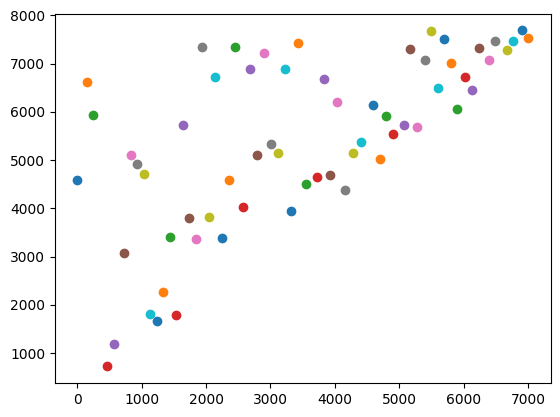

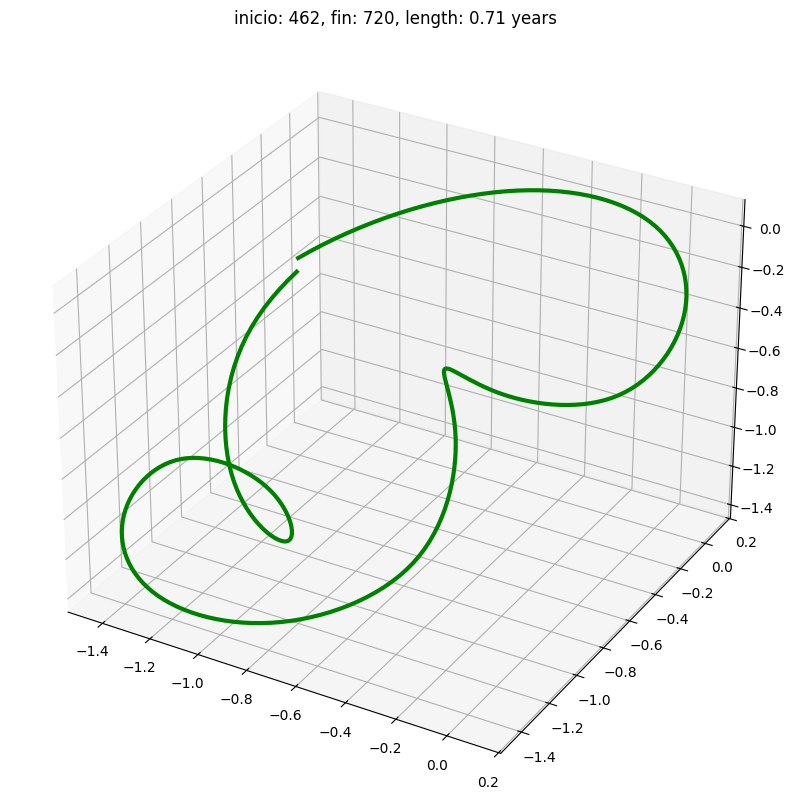

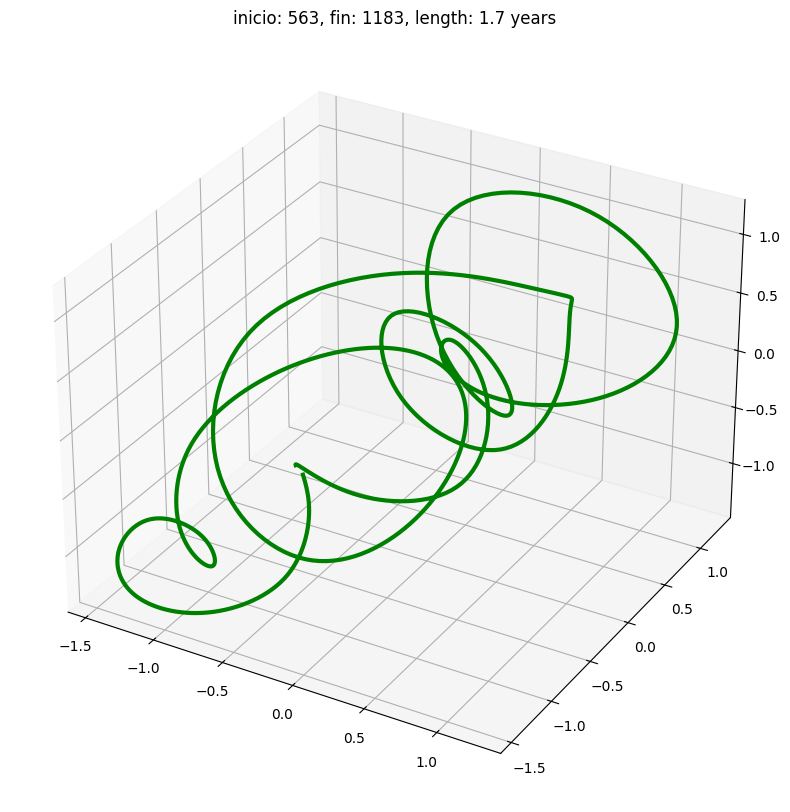

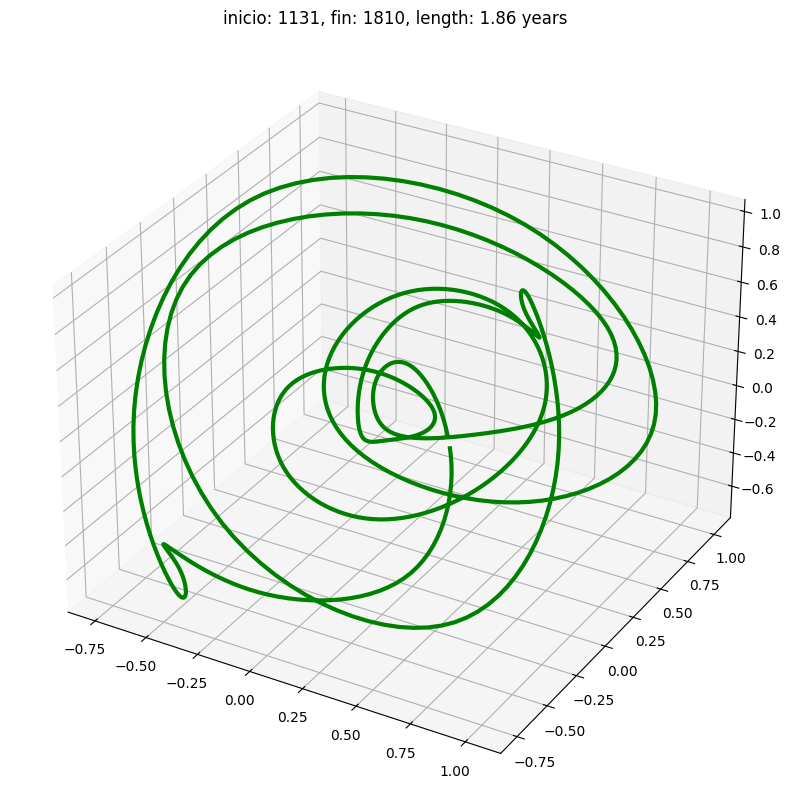

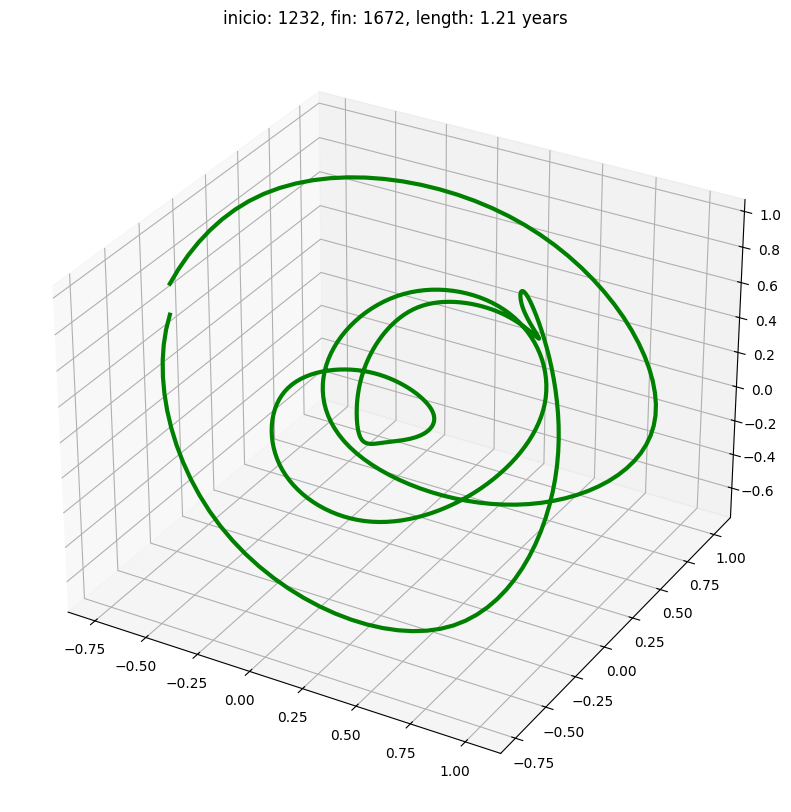

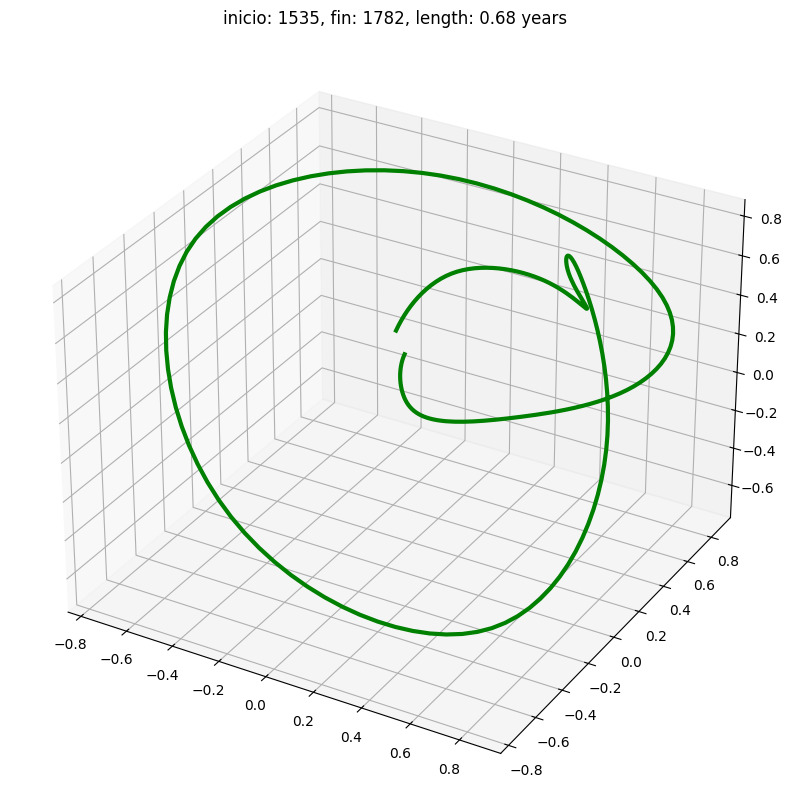

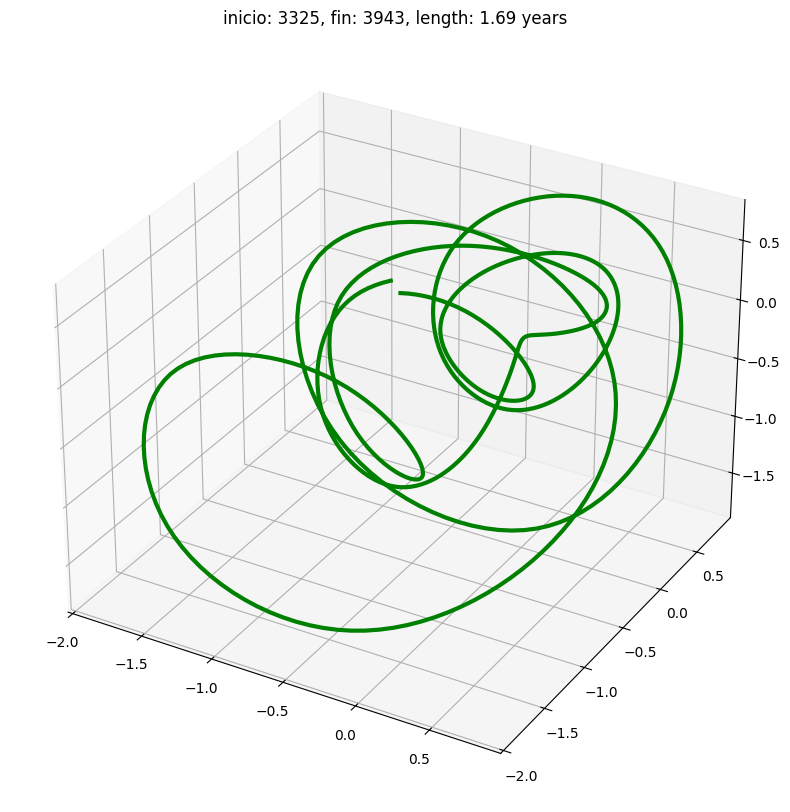

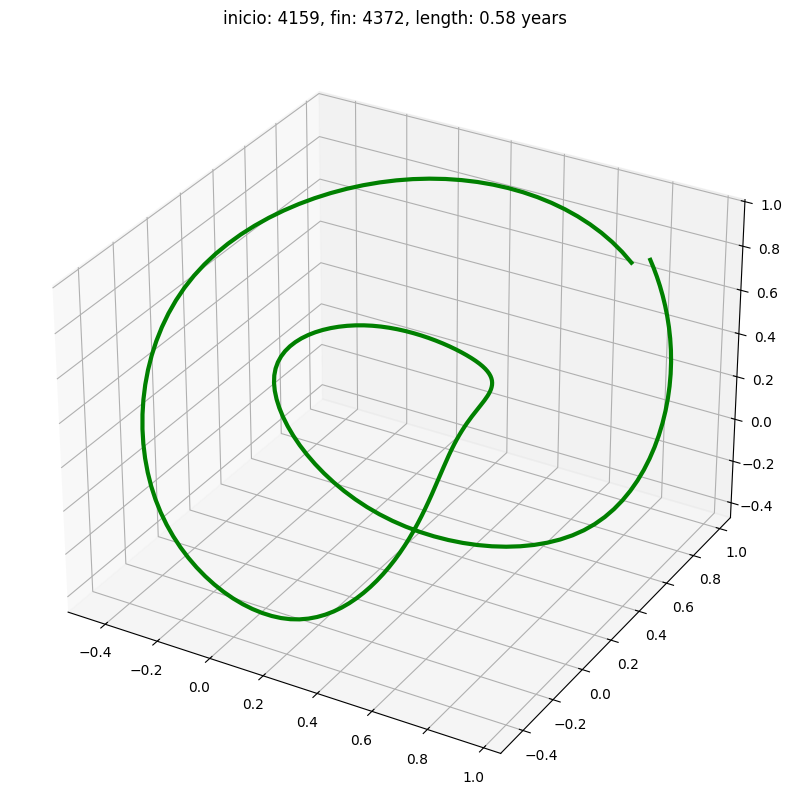

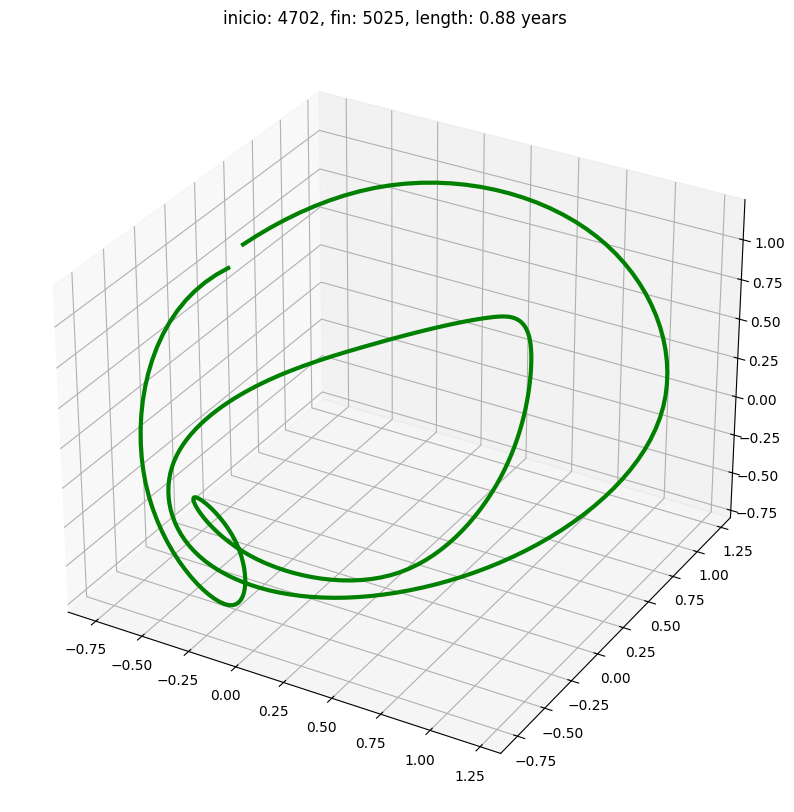

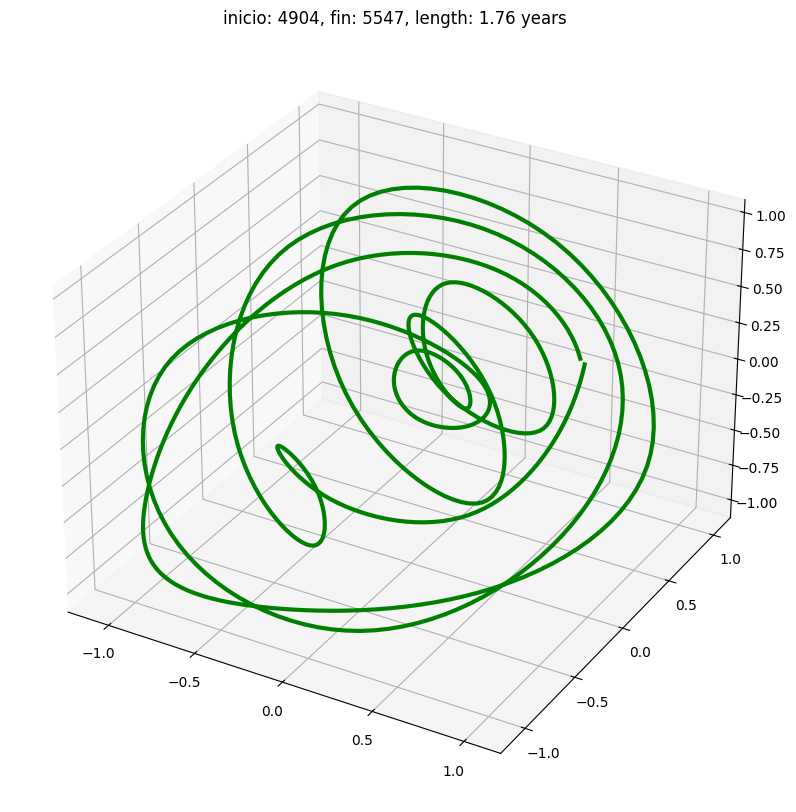

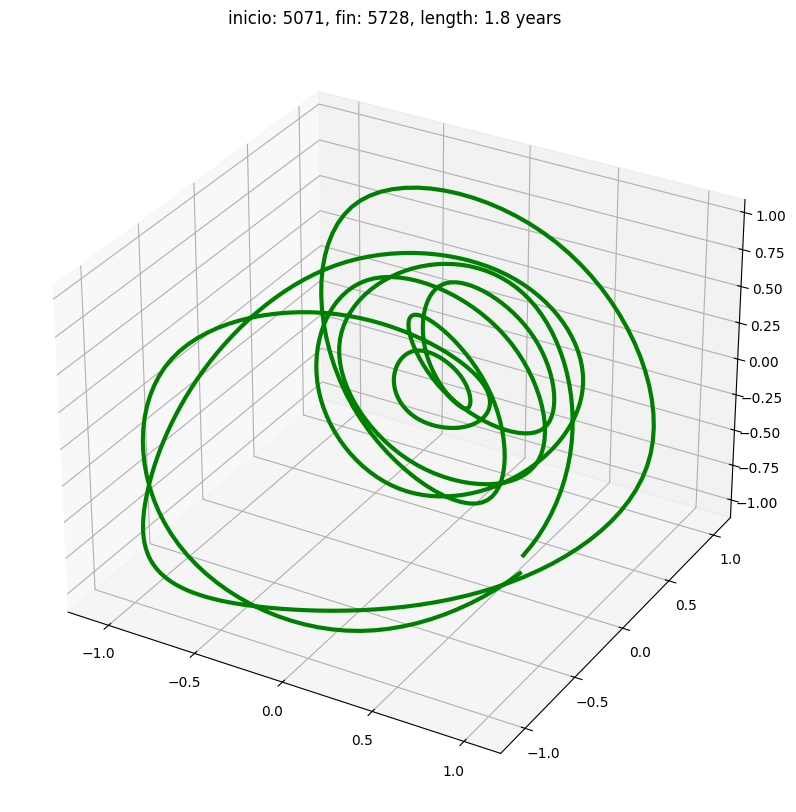

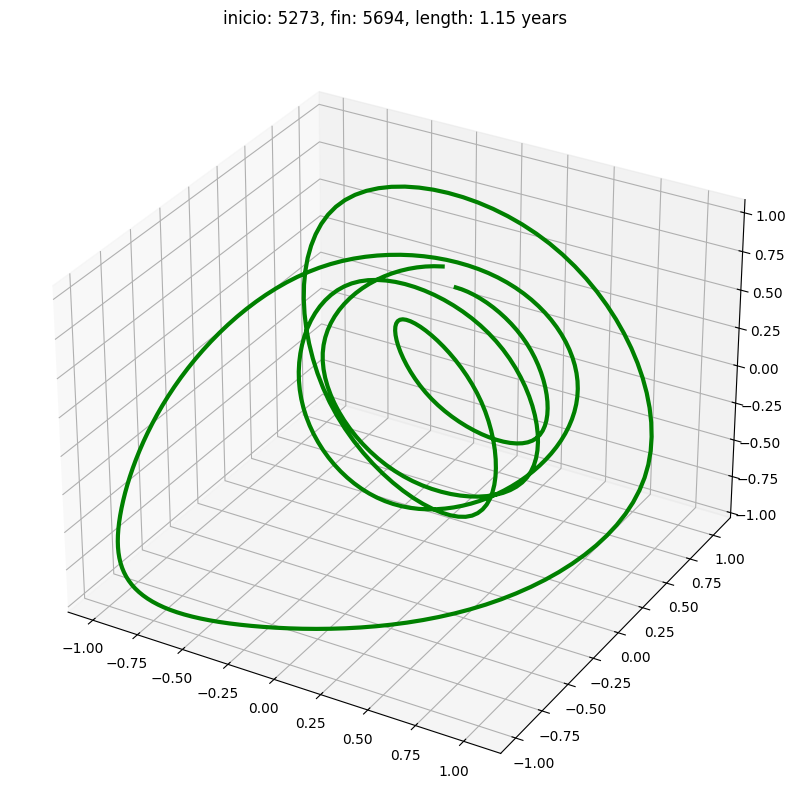

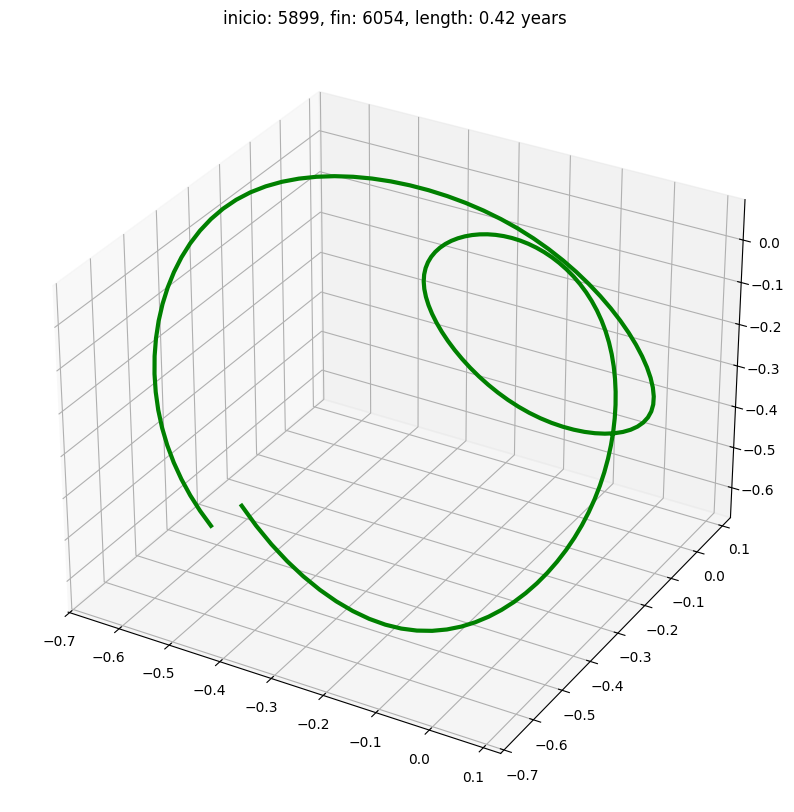

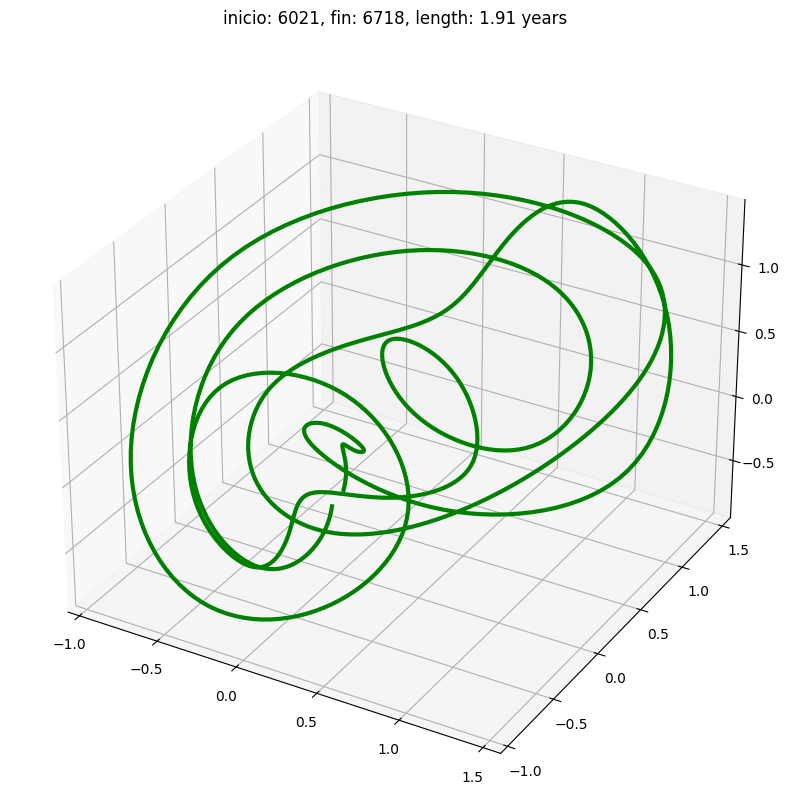

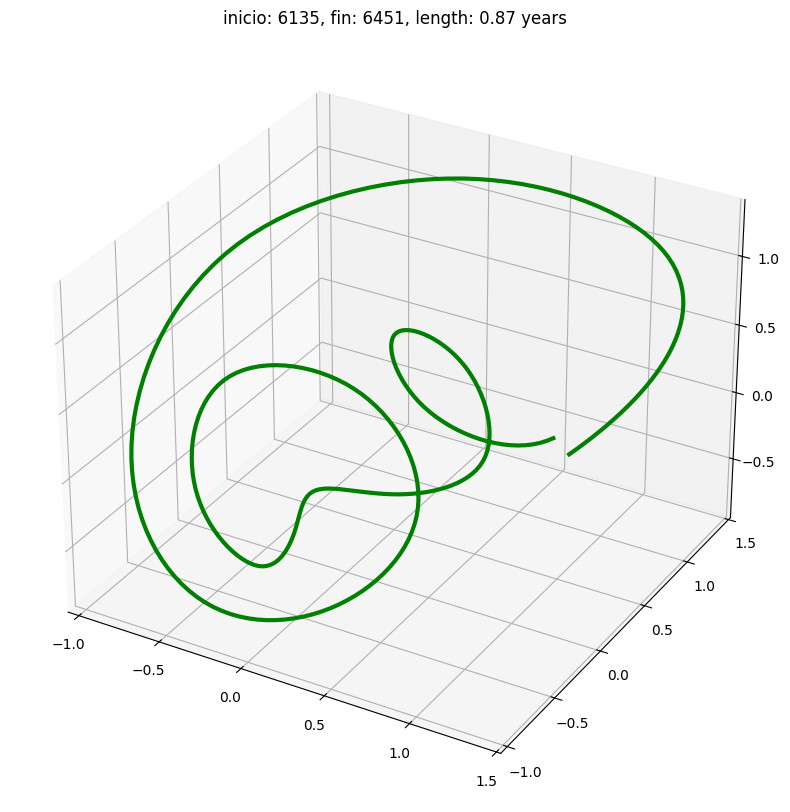

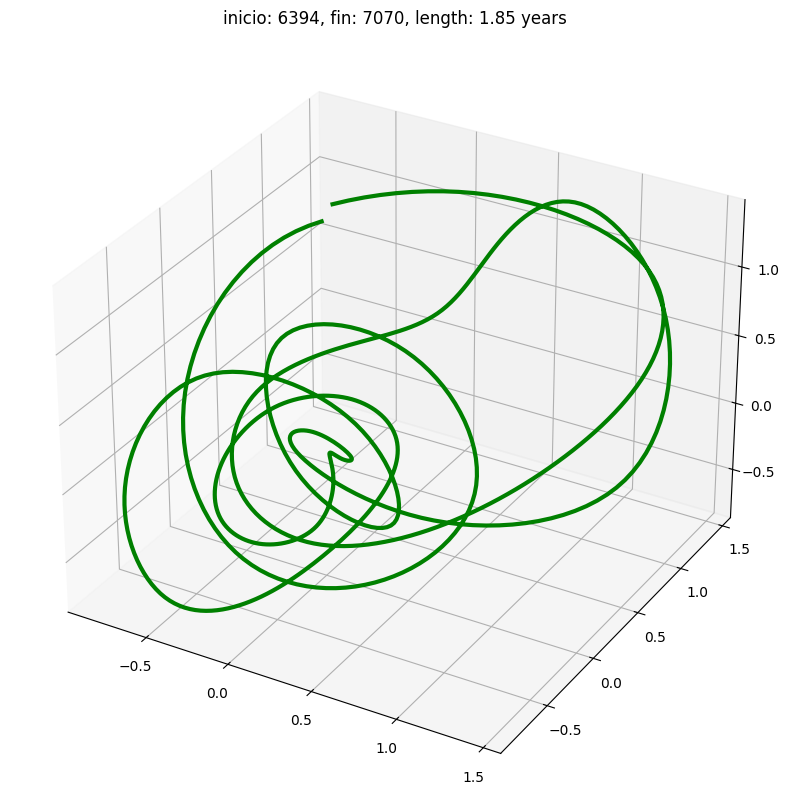

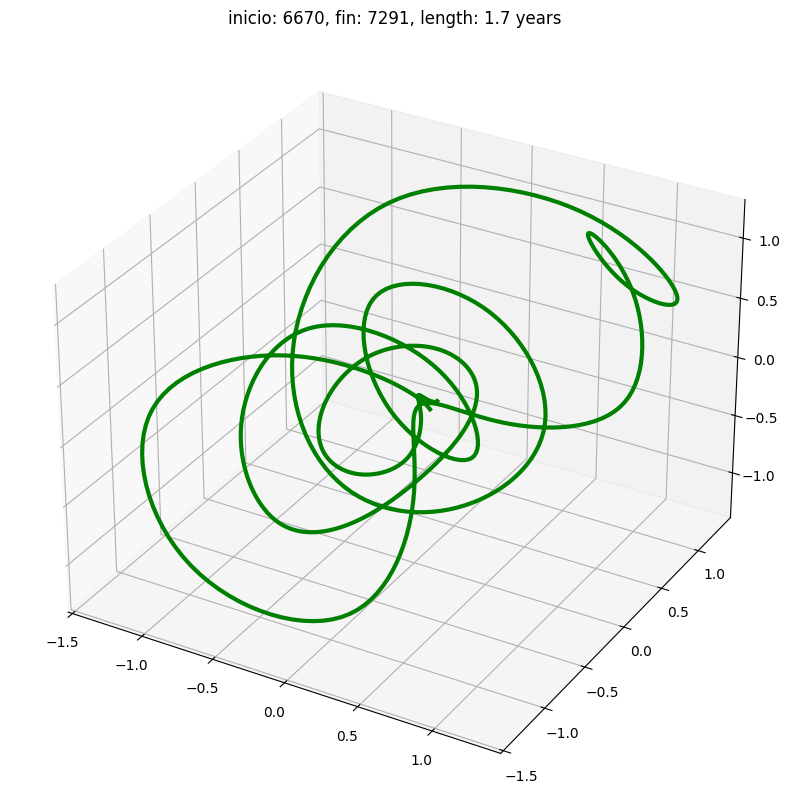

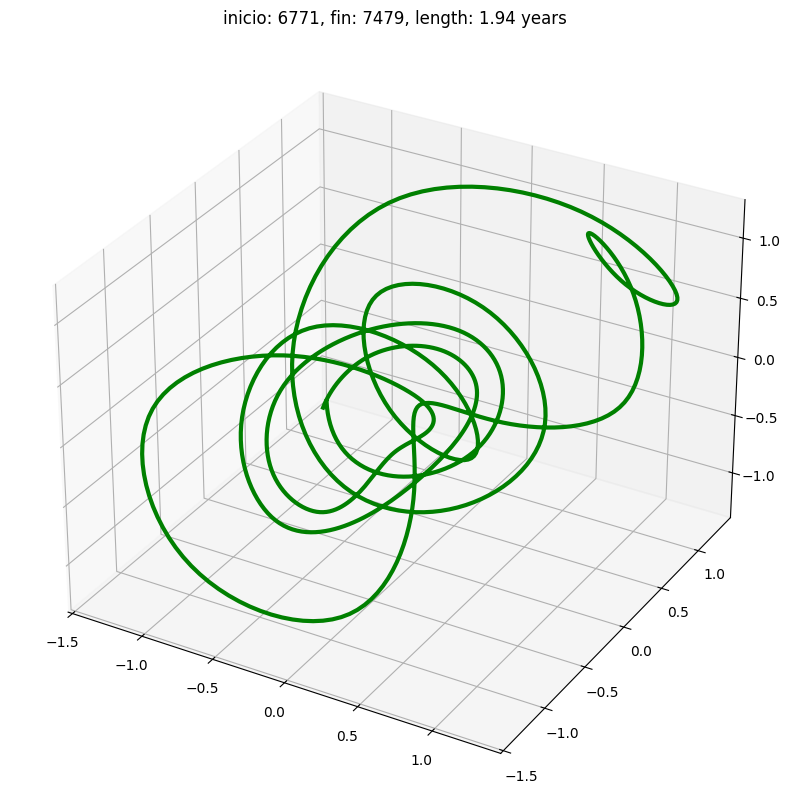

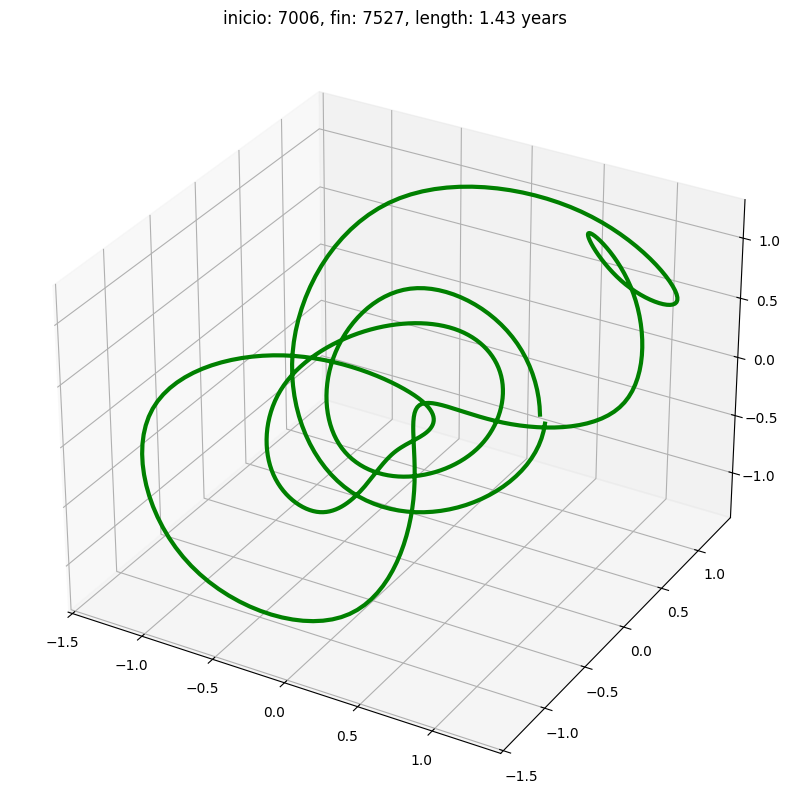

In [27]:

emb_dato = fnn.embedding(15,y_interp,3).T
orbitas = find_repeated_fragments(y_interp[:10000])

orbitas_posta = []
orbita0 = orbitas[0]
orbitas_posta.append(orbita0)
for orbita in orbitas:
    if ((np.abs(orbita[0] - orbita0[0]) > 100) and (np.abs(orbita[1] - orbita0[1]) > 100)):
        orbitas_posta.append(orbita)
        orbita0 = orbita

for orbit in orbitas_posta:
    plt.scatter(orbit[0],orbit[1])

emb_dato = fnn.embedding(15,y_interp,3).T
for orbita in orbitas_posta:
    len_orbit = round((orbita[1] - orbita[0])/365,2)
    print(len_orbit)
    if len_orbit < 2:
        plot_orbita(emb_dato,orbita[0],orbita[1])
        plt.title('inicio: '+str(orbita[0])+', fin: '+str(orbita[1])+', length: '+str(round((orbita[1] - orbita[0])/365,2))+' years')